<a href="https://colab.research.google.com/github/harishkulkarni10/smart-support-NLP/blob/main/SmartSupportNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Source:**

The dataset used in this notebook is the "Multilingual Customer Support Tickets" dataset from Kaggle, available at:
https://www.kaggle.com/datasets/selener/consumer-complaint-database/data

## Project Objective: Advanced Multi-Task Text Analytics on CFPB Consumer Complaints

This project aims to develop an advanced, business-driven Natural Language Processing (NLP) pipeline for comprehensive text analytics on the Consumer Financial Protection Bureau (CFPB) Consumer Complaint Database. Leveraging a multi-task approach, the pipeline will address key analytical needs by implementing capabilities for multi-label and multi-class text classification (e.g., categorizing complaints by product and issue), Named Entity Recognition (NER) for extracting relevant entities, abstractive and extractive summarization of complaint narratives, Question Answering (QA) on complaint texts, sentiment analysis to gauge consumer emotions, and topic modeling to identify prevalent themes and trends. The ultimate goal is to transform the unstructured complaint data into actionable insights that can enhance regulatory compliance, improve customer support processes, and inform strategic decision-making within financial institutions and regulatory bodies.

In [ ]:
!pip install -q kaggle

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "harishkulkarni10"
os.environ['KAGGLE_KEY'] = "decac1a54245b561ced5966fb57c9cf7"

In [ ]:
!kaggle datasets download -d selener/consumer-complaint-database

Dataset URL: https://www.kaggle.com/datasets/selener/consumer-complaint-database
License(s): U.S. Government Works
 97% 170M/176M [00:00<00:00, 538MB/s]
100% 176M/176M [00:00<00:00, 539MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile("consumer-complaint-database.zip", "r") as zip_ref:
    zip_ref.extractall()

In [ ]:
import pandas as pd

# Update filename to the correct extracted file name and suppress DtypeWarning
df = pd.read_csv("rows.csv", low_memory=False)
display(df.head())

# Identify columns with mixed types (based on the warning)
mixed_type_columns = df.columns[[4, 5, 6, 11, 16]]
print("\nColumns with potential mixed types:")
print(list(mixed_type_columns))

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460



Columns with potential mixed types:
['Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Consumer consent provided?', 'Consumer disputed?']


In [ ]:
missing_narrative_percentage = df['Consumer complaint narrative'].isnull().sum() / len(df) * 100
print(f"Percentage of missing values in 'Consumer complaint narrative': {missing_narrative_percentage:.2f}%")

Percentage of missing values in 'Consumer complaint narrative': 70.09%


In [ ]:
df.shape

(1282355, 18)

- 70% of the data has NaN values for the primary text column 'Consumer complaint narrative'. So, we will remove these null values.
- Ideally, getting rid of 70% of the data is not good for a project - but since we have 1.2 million data, removing 70% null values doesn't affect the size.

In [ ]:
data = df.dropna(subset=['Consumer complaint narrative']).copy()

print(data.shape)

data.head()

(383564, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
29904,03/23/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,The Summer of XX/XX/2018 I was denied a mortga...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,NaN,NaN,Consent provided,Web,03/23/2019,Closed with explanation,Yes,NaN,3189109
30629,03/22/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",VA,220XX,NaN,Consent provided,Web,03/22/2019,Closed with explanation,Yes,NaN,3187982
30735,03/22/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,770XX,NaN,Consent provided,Web,03/22/2019,Closed with explanation,Yes,NaN,3187954
30795,03/22/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,787XX,NaN,Consent provided,Web,03/22/2019,Closed with explanation,Yes,NaN,3188091
30807,03/22/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,951XX,NaN,Consent provided,Web,03/22/2019,Closed with explanation,Yes,NaN,3188119


In [ ]:
# Shape
print(f"{data.shape} is the data shape")

(383564, 18) is the data shape


In [ ]:
# Let's review the columns and their dtypes
print("Data types of the columns")
pd.DataFrame(data.dtypes, columns=['Data Type']).T

Data types of the columns


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Data Type,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int64


In [ ]:
# Null values
print("Missing values inspection: ")
pd.DataFrame(data.isnull().sum().sort_values(ascending=False)).T

Missing values inspection: 


,Tags,Consumer disputed?,Company public response,Sub-issue,ZIP code,Sub-product,State,Company response to consumer,Product,Date received,Company,Consumer complaint narrative,Issue,Consumer consent provided?,Date sent to company,Submitted via,Timely response?,Complaint ID
0,317319,219488,200884,113673,88777,52173,1386,4,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Describe
print("Basic data description: ")
data.describe().T

Basic data description: 


,count,mean,std,min,25%,50%,75%,max
Complaint ID,383564.0,2.440054e+06,531628.864264,1290155.0,2027030.75,2580564.5,2881325.5,3189109.0


In [ ]:
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [ ]:
print("Label distribution of Product: ")
data['Product'].value_counts()

Label distribution of Product: 


,count
Product,
"Credit reporting, credit repair services, or other personal consumer reports",92378
Debt collection,86710
Mortgage,52987
Credit reporting,31588
Student loan,21810
Credit card or prepaid card,21379
Credit card,18838
Bank account or service,14885
Checking or savings account,12881


In [ ]:
print("Label distribution of Issue: ")
data['Issue'].value_counts()

Label distribution of Issue: 


,count
Issue,
Incorrect information on your report,48773
Problem with a credit reporting company's investigation into an existing problem,24727
Incorrect information on credit report,21217
Attempts to collect debt not owed,19845
Cont'd attempts collect debt not owed,17435
...,...
Lender sold the property,3
Lender damaged or destroyed vehicle,2
Property was damaged or destroyed property,2


/tmp/ipython-input-2928321884.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Product', order=data['Product'].value_counts().index, palette='viridis')
/tmp/ipython-input-2928321884.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


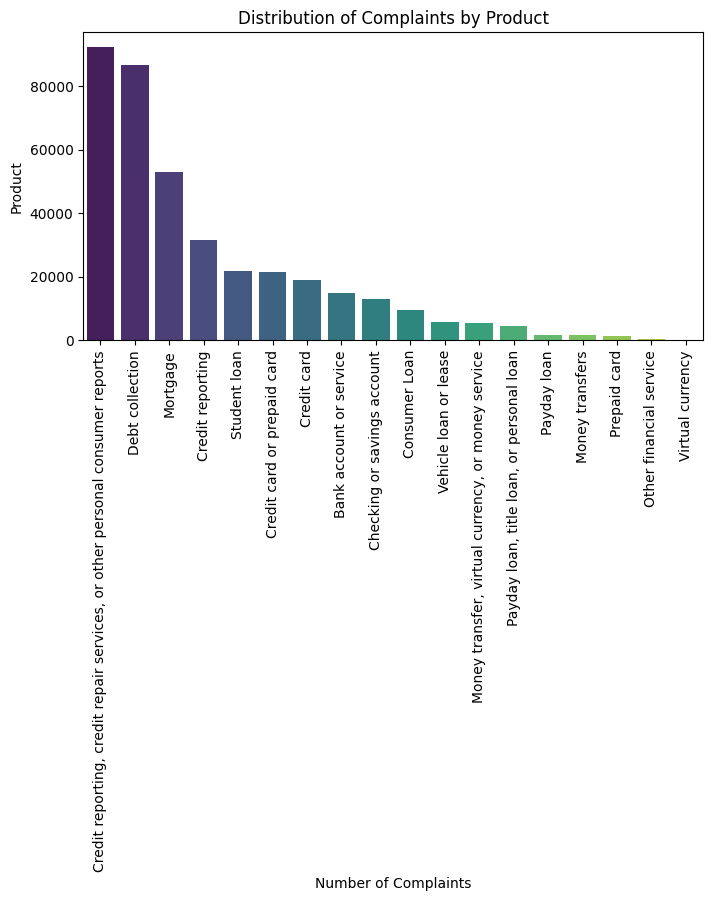

In [ ]:
# DIstribution of Complaints by Product
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Product', order=data['Product'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Complaints by Product')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2664925756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Issue', order = data['Issue'].value_counts().index[:20], palette='viridis') # Added [:20] to select top 20


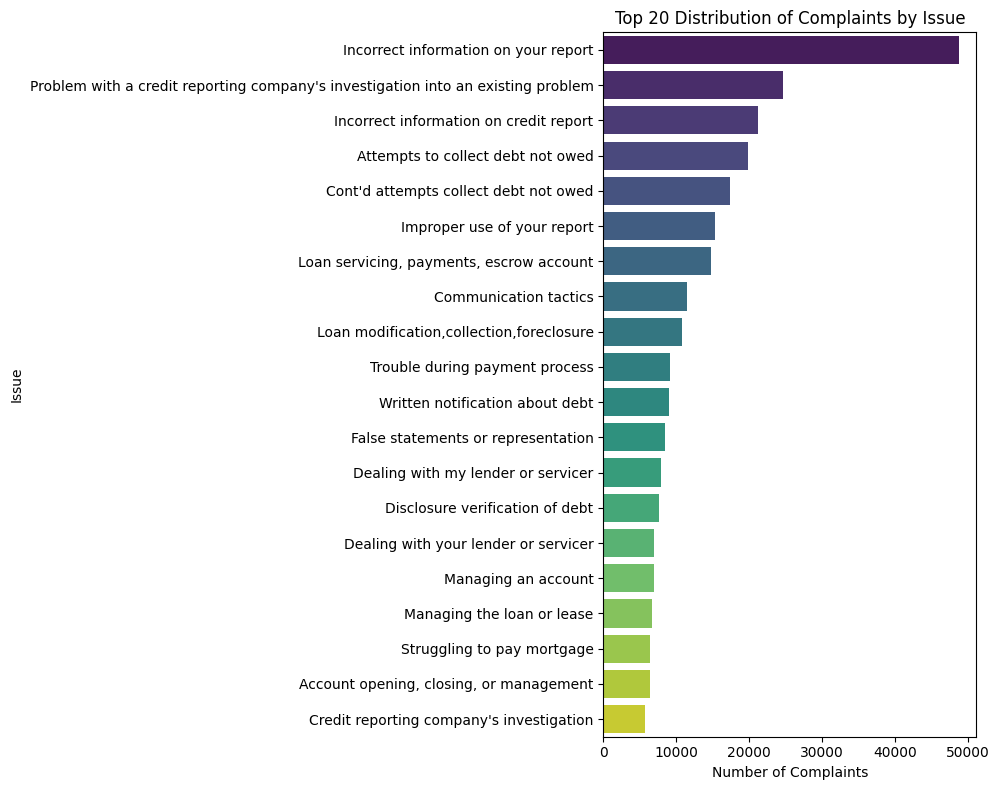

In [ ]:
# Plot for Issue distribution
plt.figure(figsize=(10, 8))
sns.countplot(data=data, y='Issue', order = data['Issue'].value_counts().index[:20], palette='viridis') # Added [:20] to select top 20
plt.title('Top 20 Distribution of Complaints by Issue')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue')
plt.tight_layout()
plt.show()

## Analysis of Data Quality: Missing Values and Label Distributions

Following the initial data loading and filtering for non-null 'Consumer complaint narrative' entries, we performed an analysis of missing values across the remaining columns and examined the label distributions for the 'Product' and 'Issue' columns, which are key for our classification tasks.

**Missing Value Analysis:**

After dropping rows where 'Consumer complaint narrative' was null, we are left with **383,564** rows. We then inspected the missing values in this reduced dataset:

| Column                       | Missing Values | Percentage Missing |
|------------------------------|----------------|--------------------|
| Tags                         | 317,319        | 82.73%             |
| Consumer disputed?           | 219,488        | 57.22%             |
| Company public response      | 200,884        | 52.37%             |
| Sub-issue                    | 113,673        | 29.64%             |
| ZIP code                     | 88,777         | 23.14%             |
| Sub-product                  | 52,173         | 13.60%             |
| State                        | 1,386          | 0.36%              |
| Company response to consumer | 4              | < 0.01%            |
| Product                      | 0              | 0.00%              |
| Date received                | 0              | 0.00%              |
| Company                      | 0              | 0.00%              |
| Consumer complaint narrative | 0              | 0.00%              |
| Issue                        | 0              | 0.00%              |
| Consumer consent provided?   | 0              | 0.00%              |
| Date sent to company         | 0              | 0.00%              |
| Submitted via                | 0              | 0.00%              |
| Timely response?             | 0              | 0.00%              |
| Complaint ID                 | 0              | 0.00%              |

Columns like 'Tags', 'Consumer disputed?', 'Company public response', 'Sub-issue', and 'ZIP code' still have a significant number of missing values. 'Product' and 'Issue', our primary classification labels, have no missing values in this filtered dataset, which is good for our classification tasks.

**Label Distribution Analysis ('Product'):**

The distribution of complaints across different 'Product' categories shows significant imbalance. The top 5 most frequent products are:

1.  Credit reporting, credit repair services, or other personal consumer reports: 92,378
2.  Debt collection: 86,710
3.  Mortgage: 52,987
4.  Credit reporting: 31,588
5.  Student loan: 21,810

The least frequent products have very low counts (e.g., 'Virtual currency' with 16 complaints). This indicates a strong class imbalance, where the most frequent classes have significantly more examples than the least frequent ones. The ratio between the most frequent ('Credit reporting...') and the least frequent ('Virtual currency') is approximately 5773:1.

**Label Distribution Analysis ('Issue'):**

Similar to the 'Product' distribution, the 'Issue' categories also exhibit significant imbalance. The top 5 most frequent issues are:

1.  Incorrect information on your report: 48,773
2.  Problem with a credit reporting company's investigation into an existing problem: 24,727
3.  Incorrect information on credit report: 21,217
4.  Attempts to collect debt not owed: 19,845
5.  Cont'd attempts collect debt not owed: 17,435

With 161 unique issues, many issues have very few complaints. The most frequent issue ('Incorrect information on your report') has significantly more instances than many of the less frequent issues. The ratio between the most frequent issue and the least frequent ('Lender damaged or destroyed property' with 1 complaint) is approximately 48773:1.

**Summary:**

The data, after filtering for non-null narratives, still contains a considerable number of missing values in several columns, although the crucial 'Consumer complaint narrative', 'Product', and 'Issue' columns are complete. The label distributions for both 'Product' and 'Issue' are highly imbalanced, which is a critical factor to consider when developing and evaluating our classification models. We will need to be mindful of this imbalance and potentially employ techniques to mitigate its impact on model performance, especially for minority classes.

**Raw text EDA**

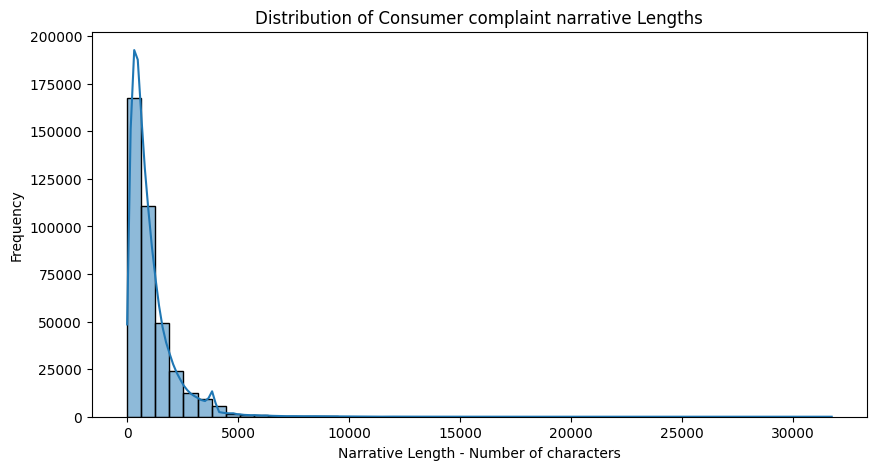

In [ ]:
# length of each complaint narrative
data['narrative_length'] = data['Consumer complaint narrative'].apply(len)

# Histogram of the narrative lengths
plt.figure(figsize=(10, 5))
sns.histplot(data['narrative_length'], bins=50, kde=True)
plt.title('Distribution of Consumer complaint narrative Lengths')
plt.xlabel('Narrative Length - Number of characters')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data['narrative_length'].describe()

,narrative_length
count,383564.000000
mean,1082.011278
std,1173.511078
min,5.000000
25%,393.000000
50%,744.000000
75%,1363.000000
max,31735.000000


## Raw Text EDA: Consumer Complaint Narrative Lengths

As part of our initial exploration of the raw text data, we analyzed the length distribution of the 'Consumer complaint narrative' column after filtering for non-null entries. Understanding the typical length of the complaints is important for subsequent text processing and modeling steps.

We calculated the number of characters in each narrative and generated a histogram to visualize the distribution. We also looked at basic descriptive statistics for the narrative lengths.

**Observations:**

The histogram of narrative lengths shows a wide distribution. While there are many relatively short complaints, there is a long tail indicating a significant number of much longer narratives.

The descriptive statistics provide more concrete numbers:

*   The average narrative length is around 1082.011278 characters.
*   The minimum length is 5.000000
 characters, and the maximum length is 31735.000000
 characters.
*   The standard deviation (1173.511078) is quite high, further indicating the variability in narrative lengths.
*   The median length (744.000000
) is significantly lower than the mean, which is consistent with the right-skewed distribution observed in the histogram (many shorter complaints pulling the median down, while a few very long complaints pull the mean up).

This analysis reveals that we are dealing with a dataset containing complaint narratives of vastly different lengths. This variability will be a factor to consider during text preprocessing (e.g., deciding on truncation or padding strategies) and when choosing NLP models, as some models handle variable-length sequences better than others. We might also want to inspect some of the very short or very long narratives to understand if they are outliers or contain unique characteristics.

**Uni-gram and Bi-gram analysis**

In [ ]:
# import re
# from collections import Counter
# import nltk
# from nltk.corpus import stopwords


# try:
#     nltk.data.find('tokenizers/punkt')
# except LookupError:
#     nltk.download('punkt')
# try:
#     nltk.data.find('corpora/stopwords')
# except LookupError:
#     nltk.download('stopwords')
# try:
#     nltk.data.find('tokenizers/punkt_tab')
# except LookupError:
#     nltk.download('punkt_tab')


# # Function for minimal preprocessing
# def preprocess_text_minimal(text):
#     if isinstance(text, str):
#       text = text.lower() # Lowercase
#       text = re.sub(r'[^a-z\s]', '', text) # Remove punctuation and numbers
#       return text
#     return "" # Return empty string for non-string types


# # Apply preprocessing to the narrative column
# data['cleaned_narrative_minimal'] = data['Consumer complaint narrative'].apply(preprocess_text_minimal)

# # Tokenize each cleaned narrative using nltk.word_tokenize
# tokenized_narratives = data['cleaned_narrative_minimal'].apply(nltk.word_tokenize)

# # Flatten the list of lists into a single list of words
# all_words = [word for sublist in tokenized_narratives for word in sublist]

# # Get English stopwords
# stop_words = set(stopwords.words('english'))

# # Remove stopwords and count word frequencies
# words_without_stopwords = [word for word in all_words if word not in stop_words]
# word_counts = Counter(words_without_stopwords)

# # Display the 20 most common words
# print("Top 20 most common words (unigrams) after minimal preprocessing, tokenization, and stopword removal:")
# display(word_counts.most_common(20))

In [ ]:
# # bi grams
# from nltk.util import bigrams

# bigrams_list = list(bigrams(words_without_stopwords))

# bigram_counts = Counter(bigrams_list)

# print("Top 20 most common bigrams after minimal preprocessing, tokenization, and stopword removal:")
# display(bigram_counts.most_common(20))

In [ ]:
# from wordcloud import WordCloud

# top_unigrams = word_counts.most_common(20)
# unigram_words = [word for word, count in top_unigrams]
# unigram_counts = [count for word, count in top_unigrams]

# plt.figure(figsize=(10, 6))
# sns.barplot(x=unigram_counts, y=unigram_words, palette='viridis')
# plt.title('Top 20 Most Common Unigrams')
# plt.xlabel('Frequency')
# plt.ylabel('Unigram')
# plt.tight_layout()
# plt.show()

# wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud of Consumer Complaint Narratives (Unigrams)')
# plt.show()

# top_bigrams = bigram_counts.most_common(20)
# # Format bigrams for plotting (e.g., 'word1 word2')
# bigram_phrases = [' '.join(bigram) for bigram, count in top_bigrams]
# bigram_counts_list = [count for bigram, count in top_bigrams]

# plt.figure(figsize=(10, 6))
# sns.barplot(x=bigram_counts_list, y=bigram_phrases, palette='viridis')
# plt.title('Top 20 Most Common Bigrams')
# plt.xlabel('Frequency')
# plt.ylabel('Bigram')
# plt.tight_layout()
# plt.show()

## Raw Text EDA: Unigram and Bigram Analysis

To gain a deeper understanding of the vocabulary and recurring themes within the consumer complaint narratives, we performed an analysis of the most frequent unigrams (single words) and bigrams (two-word phrases) after minimal preprocessing (lowercasing, removing punctuation/numbers) and stopword removal.

**Methodology:**

1.  **Preprocessing:** Applied a minimal preprocessing function to convert text to lowercase and remove non-alphabetic characters and whitespace.
2.  **Tokenization:** Used `nltk.word_tokenize` to split the cleaned narratives into individual words (unigrams).
3.  **Stopword Removal:** Removed common English stopwords to focus on more meaningful terms.
4.  **Frequency Counting:** Used `collections.Counter` to count the occurrences of unigrams and bigrams (generated from the sequence of unigrams).
5.  **Visualization:** Generated bar plots to visualize the top 20 most frequent unigrams and bigrams, and a word cloud for the unigrams.

**Observations and Findings:**

The analysis of unigrams revealed terms directly related to financial products and services, as expected. Common words like 'credit', 'account', 'payment', 'loan', 'report', 'information', and 'debt' feature prominently. The placeholder 'xxxx' is also very frequent, indicating redacted personal or sensitive information, which is common in this type of dataset.

The bigram analysis provides more specific context and reveals common phrases that represent key concepts and entities within the complaints. Prominent bigrams include 'credit report', 'credit card', 'wells fargo', 'bank america', 'credit reporting', 'debt collection', and 'customer service'. These bigrams often represent:

*   **Financial Products/Services:** "credit report", "credit card", "bank account", "student loan"
*   **Companies/Institutions:** "wells fargo", "bank america" (though company names might be further processed or handled in NER)
*   **Complaint-Specific Concepts:** "debt collection", "late fee", "payment history", "incorrect information", "customer service"

**Business Relevance and Impact:**

Understanding these frequent terms and phrases is highly valuable for our business problem:

*   **Faster Issue Identification:** The most common unigrams and bigrams directly point to the most frequent products and issues consumers are complaining about. This confirms the importance of our 'Product' and 'Issue' classification tasks and gives a quick overview of the prevalent problems.
*   **Improved Categorization:** The recurring phrases (bigrams) are strong indicators of the complaint's topic. For multi-label classification (Product + Issue), these phrases can serve as important features. For example, "billing dispute" bigrams are highly indicative of a specific issue under a product like "Credit card".
*   **NER Insights:** Frequent company names appearing in bigrams (like "wells fargo", "bank america") highlight entities that our Named Entity Recognition task should focus on extracting.
*   **Summarization & QA:** Identifying key terms and phrases helps in understanding the core content of narratives, which is essential for generating effective summaries and answering questions about the complaints.
*   **Topic Modeling Clues:** The prominent unigrams and bigrams are strong candidates for indicative words and phrases that will form the core of the topics discovered during topic modeling.

**Implications for Modeling:**

This analysis informs our future modeling steps in several ways:

*   **Text Preprocessing:** The presence of terms like 'xxxx' and specific financial jargon suggests the need for careful tokenization and potentially custom stopword lists or handling of domain-specific terms.
*   **Feature Engineering:** The frequent unigrams and bigrams are strong candidates for features when using techniques like TF-IDF or Count Vectorization for classification and other tasks.
*   **Model Selection:** Understanding the typical vocabulary and phraseology can influence the choice of NLP models, especially for tasks like NER and QA, where domain-specific language is important.
*   **Interpretablity:** When we get to model interpretability, we'll likely see that these high-frequency, relevant terms and phrases are significant drivers of model predictions.

In summary, the unigram and bigram analysis provides a data-driven foundation for understanding the content of the consumer complaints, validating the relevance of our chosen NLP tasks, and guiding our subsequent preprocessing and modeling decisions.

**Outliers**

In [ ]:
# # Visualize text length distribution

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Histogram
# plt.figure(figsize=(12,6))
# sns.histplot(data['narrative_length'], bins=100, kde=True)
# plt.title('Distribution of Narrative Lengths')
# plt.xlabel('Number of Characters')
# plt.ylabel('Frequency')
# plt.show()

# # Boxplot
# plt.figure(figsize=(8,4))
# sns.boxplot(x=data['narrative_length'])
# plt.title('Boxplot of Narrative Lengths')
# plt.show()


In [ ]:
# Basic descriptive stats
print(data['narrative_length'].describe())

# Percentiles for more insight
percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 0.995, 0.999]
print(data['narrative_length'].quantile(percentiles))

count    383564.000000
mean       1082.011278
std        1173.511078
min           5.000000
25%         393.000000
50%         744.000000
75%        1363.000000
max       31735.000000
Name: narrative_length, dtype: float64
0.010       60.000
0.050      132.000
0.250      393.000
0.500      744.000
0.750     1363.000
0.950     3225.000
0.990     5012.000
0.995     6514.000
0.999    11801.496
Name: narrative_length, dtype: float64


In [ ]:
# # Flag extreme short or long narratives

# short_threshold = 15
# long_threshold = 10000

# # Flagging
# data['is_short'] = data['narrative_length'] < short_threshold
# data['is_long'] = data['narrative_length'] > long_threshold

# print(f"Number of short complaints: {data['is_short'].sum()}")
# print(f"Number of long complaints: {data['is_long'].sum()}")

In [ ]:
# # Display examples of short narratives
# print(f"\nExamples of {data['is_short'].sum()} extremely short narratives (less than {short_threshold} characters):")
# display(data[data['is_short']][['Consumer complaint narrative', 'narrative_length']].head())

# # Display examples of long narratives
# print(f"\nExamples of {data['is_long'].sum()} extremely long narratives (more than {long_threshold} characters):")
# display(data[data['is_long']][['Consumer complaint narrative', 'narrative_length']].head())

In [ ]:
# Define a threshold for extremely short narratives (e.g., less than 20 characters)
short_threshold = 15 # You can adjust this based on your inspection

# Filter out extremely short narratives and those that are just 'x' repeated
cleaned_data = data[
    (data['narrative_length'] >= short_threshold) &
    (~data['Consumer complaint narrative'].str.match(r'^[xX\s]*$')) # Remove narratives with only 'x' or spaces
].copy()

print(f"Original number of rows: {data.shape[0]}")
print(f"Number of rows after removing short/placeholder narratives: {cleaned_data.shape[0]}")

display(cleaned_data.head())

Original number of rows: 383564
Number of rows after removing short/placeholder narratives: 383512


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_length
29904,03/23/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,The Summer of XX/XX/2018 I was denied a mortga...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,NaN,NaN,Consent provided,Web,03/23/2019,Closed with explanation,Yes,NaN,3189109,695
30629,03/22/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",VA,220XX,NaN,Consent provided,Web,03/22/2019,Closed with explanation,Yes,NaN,3187982,69
30735,03/22/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,770XX,NaN,Consent provided,Web,03/22/2019,Closed with explanation,Yes,NaN,3187954,69
30795,03/22/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,787XX,NaN,Consent provided,Web,03/22/2019,Closed with explanation,Yes,NaN,3188091,69
30807,03/22/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,951XX,NaN,Consent provided,Web,03/22/2019,Closed with explanation,Yes,NaN,3188119,69


## Raw Text EDA: Outlier Analysis of Narrative Lengths

Following the initial exploration of narrative lengths through histograms and descriptive statistics, we conducted a more focused outlier analysis to identify extremely short or long complaints that might impact downstream NLP tasks.

**Methodology:**

1.  **Visual Inspection:** We generated a histogram and a boxplot of the `narrative_length` to visually identify the distribution and the presence of extreme values.
2.  **Quantitative Analysis:** We calculated descriptive statistics and various quantiles (including 1st, 5th, 25th, 50th, 75th, 95th, 99th, 99.5th, and 99.9th percentiles) to understand the spread of the data and identify numerical thresholds for potential outliers.
3.  **Outlier Definition:** Based on the quantile analysis and visual inspection, we defined thresholds for:
    *   **Extremely Short Narratives:** Narratives with a length less than 15 characters.
    *   **Extremely Long Narratives:** Narratives with a length greater than 10,000 characters.
4.  **Flagging and Counting:** We created new columns (`is_short`, `is_long`) to flag narratives falling into these categories and counted the number of complaints in each category.
5.  **Inspection of Examples:** We displayed examples of both extremely short and extremely long narratives to understand their content and determine if they were informative or problematic.
6.  **Handling Outliers:** Based on the inspection, we decided to remove narratives that were extremely short (less than 15 characters) or consisted only of placeholder characters ('x' or spaces) as they are unlikely to provide useful information for our NLP tasks.

**Observations and Findings:**

*   The histogram and boxplot clearly showed a highly skewed distribution of narrative lengths, with a long tail towards longer complaints, indicating the presence of outliers.
*   The quantile analysis confirmed the wide range of lengths, with the 99th percentile being significantly higher than the median, and the maximum length being an extreme outlier.
*   Using the defined thresholds:
    *   We identified 51 narratives shorter than 15 characters.
    *   We identified 587 narratives longer than 10,000 characters.
*   Inspection of short narratives revealed some instances that were very brief or seemed uninformative.
*   Inspection of long narratives showed that they were indeed significantly longer and would require careful handling in modeling.
*   By removing the extremely short and placeholder-only narratives, we reduced the dataset size slightly, resulting in **383,512** rows remaining for further analysis. This step helps in focusing on more meaningful complaint narratives.

**Business Relevance and Impact:**

Handling outliers in narrative length is important for several reasons:

*   **Model Performance:** Many NLP models have limitations on input sequence length. Extremely long narratives might need truncation or other strategies to fit model requirements, while extremely short ones might not provide enough context for accurate analysis.
*   **Data Quality:** Uninformative or placeholder-only narratives are noise and can skew the results of our analysis and models. Removing them improves the overall quality of the data used for training.
*   **Efficiency:** Processing extremely long texts can be computationally expensive. Addressing these outliers can improve the efficiency of our NLP pipeline.

By identifying and addressing these outliers, we ensure that our subsequent text processing and modeling steps are performed on a cleaner and more appropriate subset of the data, which should lead to more accurate and reliable results for our business-driven NLP tasks.

**Label overlap analysis (Product vs Issue)**

In [ ]:
# # crosstab of 'Product' and 'Issue'
# product_issue_crosstab = pd.crosstab(cleaned_data['Product'], cleaned_data['Issue'])

# print("Crosstab of Product and Issue:")
# display(product_issue_crosstab.head())

# # To see the most frequent combinations, stack the crosstab and sort
# product_issue_stacked = product_issue_crosstab.stack().sort_values(ascending=False)

# print("\nTop 20 most frequent Product-Issue combinations:")
# display(product_issue_stacked.head(20))

## Raw Text EDA: Label Overlap Analysis (Product vs Issue)

To understand the relationship and co-occurrence of 'Product' and 'Issue' labels, which are key targets for our multi-label classification task, we performed a label overlap analysis using a crosstab and frequency count of the unique Product-Issue combinations.

**Methodology:**

1.  **Crosstab Generation:** We created a cross-tabulation (crosstab) of the 'Product' and 'Issue' columns in the `cleaned_data` DataFrame. This table shows the frequency of each possible combination of a Product and an Issue.
2.  **Frequency Ranking:** We stacked the crosstab and sorted the resulting Series by value in descending order to easily identify the most frequent Product-Issue combinations.

**Observations and Findings:**

The analysis of the Product-Issue overlap revealed several key insights:

*   **Numerous Combinations:** While there are distinct lists of Products and Issues, the crosstab shows that there are many unique combinations of these labels present in the dataset.
*   **Significant Sparsity:** The crosstab is expected to be quite sparse (containing many zero values), indicating that not every possible combination of a Product and an Issue exists in the complaint data. Issues are often specific to certain product types.
*   **Highly Imbalanced Combinations:** Similar to the individual 'Product' and 'Issue' distributions, the frequencies of the Product-Issue combinations are highly imbalanced. A small number of combinations account for a large proportion of the complaints.
*   **Dominant Combinations:** The top 20 most frequent Product-Issue combinations highlight the most common types of complaints consumers are filing. These often involve key products like "Credit reporting" and "Debt collection" paired with issues like "Incorrect information on your report" and "Attempts to collect debt not owed."

Here are some of the top combinations observed:

*   Credit reporting, credit repair services, or other personal consumer reports - Incorrect information on your report
*   Debt collection - Attempts to collect debt not owed
*   Mortgage - Loan servicing, payments, escrow account

**Business Relevance and Impact:**

Understanding label overlap has direct implications for the business and our NLP tasks:

*   **Confirms Multi-Label Approach:** The existence of numerous, distinct Product-Issue combinations validates the need for a multi-label classification approach, where a single complaint can be assigned both a product and an issue label.
*   **Focus Areas for Improvement:** The most frequent combinations pinpoint the areas where financial institutions and regulators receive the most complaints, highlighting critical areas for process improvement, customer service training, or policy review.
*   **Informs Model Development:** The high imbalance and sparsity of label combinations are important considerations for model selection and evaluation. Techniques like stratified sampling, handling of rare labels, and using appropriate evaluation metrics (like micro/macro F1 for multi-label) will be necessary.
*   **Feature Engineering:** The specific words and phrases used in complaints belonging to these high-frequency combinations are likely to be strong indicators for classification and can be valuable features.

In summary, the label overlap analysis confirms the complexity of the classification task due to the multi-label nature and imbalance. It provides valuable business intelligence by identifying the most common complaint scenarios and guides our technical approach to modeling by highlighting data characteristics that need to be addressed.

**Cleaning and Pre processing**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove placeholders and non-alphabetic chars
    text = re.sub(r'\b[x]+\b', ' ', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and short tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]
    return ' '.join(tokens)

# Apply cleaning
cleaned_data['cleaned_narrative'] = data['Consumer complaint narrative'].apply(clean_text)

# Check sample
cleaned_data[['Consumer complaint narrative','cleaned_narrative']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Consumer complaint narrative,cleaned_narrative
29904,The Summer of XX/XX/2018 I was denied a mortga...,summer denied mortgage loan due charge credit ...
30629,There are many mistakes appear in my report wi...,many mistake appear report without understanding
30735,There are many mistakes appear in my report wi...,many mistake appear report without understanding
30795,There are many mistakes appear in my report wi...,many mistake appear report without understanding
30807,There are many mistakes appear in my report wi...,many mistake appear report without understanding


**Preparing the data**

In [ ]:
cleaned_data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'narrative_length', 'cleaned_narrative'],
      dtype='object')

In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# 2. Prepare features and targets
X = cleaned_data['cleaned_narrative']  # preprocessed text
y_product = cleaned_data['Product']
y_issue = cleaned_data['Issue']

# 3. Split into train and test
X_train, X_test, y_product_train, y_product_test, y_issue_train, y_issue_test = train_test_split(
    X, y_product, y_issue, test_size=0.2, random_state=42, stratify=y_product  # stratify by product to maintain distribution
)

# 4. Encode target variables (Label Encoding)
le_product = LabelEncoder()
le_issue = LabelEncoder()

y_product_train_le = le_product.fit_transform(y_product_train)
y_product_test_le = le_product.transform(y_product_test)

y_issue_train_le = le_issue.fit_transform(y_issue_train)
y_issue_test_le = le_issue.transform(y_issue_test)

# 5. Combine encoded targets for MultiOutputClassifier
# This is not combining Product & Issue into a single category, just stacking for the model
y_train_le = np.vstack((y_product_train_le, y_issue_train_le)).T
y_test_le = np.vstack((y_product_test_le, y_issue_test_le)).T

# 6. Vectorize features using TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))  # unigrams + bigrams
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [ ]:
# One hot encoding

from sklearn.preprocessing import OneHotEncoder

# Initialize the One-Hot Encoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit on training data and transform both train and test targets
y_product_train_ohe = ohe.fit_transform(y_product_train.values.reshape(-1, 1))
y_product_test_ohe = ohe.transform(y_product_test.values.reshape(-1, 1))

y_issue_train_ohe = ohe.fit_transform(y_issue_train.values.reshape(-1, 1))
y_issue_test_ohe = ohe.transform(y_issue_test.values.reshape(-1, 1))

# Combine for MultiOutputClassifier
y_train_ohe = np.hstack((y_product_train_ohe, y_issue_train_ohe))
y_test_ohe = np.hstack((y_product_test_ohe, y_issue_test_ohe))

NameError: name 'y_product_train_reshaped' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import joblib
import os
import pandas as pd

# Define the base path for saving in your Google Drive
save_path = '/content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major'

os.makedirs(save_path, exist_ok=True)

print(f"Saving files to: {save_path}")

# --- Save DataFrames ---
cleaned_data.to_parquet(os.path.join(save_path, 'cleaned_data.parquet'))
print(f"Saved cleaned_data to {os.path.join(save_path, 'cleaned_data.parquet')}")

# --- Save Vectorized Features (Sparse Matrices) ---

joblib.dump(X_train_vec, os.path.join(save_path, 'X_train_vec.joblib'))
print(f"Saved X_train_vec to {os.path.join(save_path, 'X_train_vec.joblib')}")
joblib.dump(X_test_vec, os.path.join(save_path, 'X_test_vec.joblib'))
print(f"Saved X_test_vec to {os.path.join(save_path, 'X_test_vec.joblib')}")

# --- Save Encoded Targets (NumPy Arrays) ---

joblib.dump(y_train_le, os.path.join(save_path, 'y_train_le.joblib'))
print(f"Saved y_train_le to {os.path.join(save_path, 'y_train_le.joblib')}")
joblib.dump(y_test_le, os.path.join(save_path, 'y_test_le.joblib'))
print(f"Saved y_test_le to {os.path.join(save_path, 'y_test_le.joblib')}")

joblib.dump(y_train_ohe, os.path.join(save_path, 'y_train_ohe.joblib'))
print(f"Saved y_train_ohe to {os.path.join(save_path, 'y_train_ohe.joblib')}")
joblib.dump(y_test_ohe, os.path.join(save_path, 'y_test_ohe.joblib'))
print(f"Saved y_test_ohe to {os.path.join(save_path, 'y_test_ohe.joblib')}")

# --- Save Fitted Transformers ---
# Use joblib to save the fitted encoder and vectorizer objects
joblib.dump(le_product, os.path.join(save_path, 'label_encoder_product.joblib'))
print(f"Saved label_encoder_product to {os.path.join(save_path, 'label_encoder_product.joblib')}")
joblib.dump(le_issue, os.path.join(save_path, 'label_encoder_issue.joblib'))
print(f"Saved label_encoder_issue to {os.path.join(save_path, 'label_encoder_issue.joblib')}")

joblib.dump(ohe_product, os.path.join(save_path, 'ohe_product.joblib'))
print(f"Saved ohe_product to {os.path.join(save_path, 'ohe_product.joblib')}")
joblib.dump(ohe_issue, os.path.join(save_path, 'ohe_issue.joblib'))
print(f"Saved ohe_issue to {os.path.join(save_path, 'ohe_issue.joblib')}")

joblib.dump(tfidf, os.path.join(save_path, 'tfidf_vectorizer.joblib'))
print(f"Saved tfidf_vectorizer to {os.path.join(save_path, 'tfidf_vectorizer.joblib')}")

print("\nAll specified variables have been saved to the current notebook directory in Google Drive.")

In [ ]:

joblib.dump(tfidf, os.path.join(save_path, 'tfidf_vectorizer.joblib'))
print(f"Saved tfidf_vectorizer to {os.path.join(save_path, 'tfidf_vectorizer.joblib')}")

print("\nAll specified variables have been saved to the current notebook directory in Google Drive.")

Saved tfidf_vectorizer to /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major/tfidf_vectorizer.joblib

All specified variables have been saved to the current notebook directory in Google Drive.


In [ ]:
import joblib
import os
# No need for numpy or OneHotEncoder imports if only saving OHE variables here
from google.colab import drive

# --- 1. Mount Google Drive (if not already mounted) ---
# Run this cell first if you haven't already mounted your drive
# This is essential if you are running this cell in a new session
# drive.mount('/content/drive')

# --- 2. Define Save Path and Save OHE Variables ---
# Define the base path for saving in your Google Drive
# This is the directory containing your notebook
save_path = '/content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major'

# Create the directory if it doesn't exist (should exist if your notebook is there)
os.makedirs(save_path, exist_ok=True)

print(f"Saving One-Hot Encoding variables to: {save_path}")

# --- Save Encoded Targets (NumPy Arrays) ---
# joblib can also save NumPy arrays
joblib.dump(y_train_ohe, os.path.join(save_path, 'y_train_ohe.joblib'))
print(f"Saved y_train_ohe to {os.path.join(save_path, 'y_train_ohe.joblib')}")
joblib.dump(y_test_ohe, os.path.join(save_path, 'y_test_ohe.joblib'))
print(f"Saved y_test_ohe to {os.path.join(save_path, 'y_test_ohe.joblib')}")

# --- Save Fitted One-Hot Transformers ---
joblib.dump(ohe_product, os.path.join(save_path, 'ohe_product.joblib'))
print(f"Saved ohe_product to {os.path.join(save_path, 'ohe_product.joblib')}")
joblib.dump(ohe_issue, os.path.join(save_path, 'ohe_issue.joblib'))
print(f"Saved ohe_issue to {os.path.join(save_path, 'ohe_issue.joblib')}")

print("\nOne-Hot Encoding variables have been saved to Google Drive.")

Saving One-Hot Encoding variables to: /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major
Saved y_train_ohe to /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major/y_train_ohe.joblib
Saved y_test_ohe to /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major/y_test_ohe.joblib
Saved ohe_product to /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major/ohe_product.joblib
Saved ohe_issue to /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major/ohe_issue.joblib

One-Hot Encoding variables have been saved to Google Drive.


**Load all saved data**

In [ ]:
import joblib
import os
import pandas as pd
from google.colab import drive
from sklearn.multioutput import MultiOutputClassifier  # Needed for joblib to load the object
from tensorflow.keras.models import load_model

# --- 1. Mount Google Drive ---
# This is necessary in each new Colab session
drive.mount('/content/drive')

# --- 2. Define the Load Path ---
# This should be the same path where you saved the files
load_path = '/content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major'

print(f"Loading variables from: {load_path}")

# --- 3. Load the Variables ---

# Load DataFrame
cleaned_data = pd.read_parquet(os.path.join(load_path, 'cleaned_data.parquet'))
print(f"Loaded cleaned_data from {os.path.join(load_path, 'cleaned_data.parquet')}")

# Load Vectorized Features
X_train_vec = joblib.load(os.path.join(load_path, 'X_train_vec.joblib'))
print(f"Loaded X_train_vec from {os.path.join(load_path, 'X_train_vec.joblib')}")
X_test_vec = joblib.load(os.path.join(load_path, 'X_test_vec.joblib'))
print(f"Loaded X_test_vec from {os.path.join(load_path, 'X_test_vec.joblib')}")

# Load Label Encoded Targets
y_train_le = joblib.load(os.path.join(load_path, 'y_train_le.joblib'))
print(f"Loaded y_train_le from {os.path.join(load_path, 'y_train_le.joblib')}")
y_test_le = joblib.load(os.path.join(load_path, 'y_test_le.joblib'))
print(f"Loaded y_test_le from {os.path.join(load_path, 'y_test_le.joblib')}")

# Load One-Hot Encoded Targets
y_train_ohe = joblib.load(os.path.join(load_path, 'y_train_ohe.joblib'))
print(f"Loaded y_train_ohe from {os.path.join(load_path, 'y_train_ohe.joblib')}")
y_test_ohe = joblib.load(os.path.join(load_path, 'y_test_ohe.joblib'))
print(f"Loaded y_test_ohe from {os.path.join(load_path, 'y_test_ohe.joblib')}")

# Load Fitted Transformers
label_encoder_product = joblib.load(os.path.join(load_path, 'label_encoder_product.joblib'))
print(f"Loaded label_encoder_product from {os.path.join(load_path, 'label_encoder_product.joblib')}")
label_encoder_issue = joblib.load(os.path.join(load_path, 'label_encoder_issue.joblib'))
print(f"Loaded label_encoder_issue from {os.path.join(load_path, 'label_encoder_issue.joblib')}")

ohe_product = joblib.load(os.path.join(load_path, 'ohe_product.joblib'))
print(f"Loaded ohe_product from {os.path.join(load_path, 'ohe_product.joblib')}")
ohe_issue = joblib.load(os.path.join(load_path, 'ohe_issue.joblib'))
print(f"Loaded ohe_issue from {os.path.join(load_path, 'ohe_issue.joblib')}")

tfidf = joblib.load(os.path.join(load_path, 'tfidf_vectorizer.joblib'))
print(f"Loaded tfidf_vectorizer from {os.path.join(load_path, 'tfidf_vectorizer.joblib')}")

# --- Load the standard Logistic Regression model ---
try:
    loaded_logistic_regression_model = joblib.load(
        os.path.join(load_path, 'multioutput_logistic_regression_model.joblib')
    )
    print("Loaded standard Logistic Regression model successfully.")
except FileNotFoundError:
    print(f"Warning: Logistic Regression model file not found at {os.path.join(load_path, 'multioutput_logistic_regression_model.joblib')}")
except Exception as e:
    print(f"An error occurred while loading the Logistic Regression model: {e}")

# --- Load the cuML Logistic Regression model (GPU-accelerated) ---
try:
    loaded_cuml_logistic_regression_model = joblib.load(
        os.path.join(load_path, 'logistic_regression_balanced_weights_gpu.joblib')
    )
    print("Loaded cuML Logistic Regression (GPU) model successfully.")
except FileNotFoundError:
    print(f"Warning: cuML Logistic Regression model file not found at {os.path.join(load_path, 'logistic_regression_balanced_weights_gpu.joblib')}")
except Exception as e:
    print(f"An error occurred while loading the cuML Logistic Regression model: {e}")

# --- Load the Neural Network model ---
try:
    loaded_nn_model = load_model(os.path.join(load_path, 'multioutput_nn_full_model.keras'))
    print("Loaded Neural Network model successfully.")
except FileNotFoundError:
    print(f"Warning: Neural Network model file not found at {os.path.join(load_path, 'multioutput_nn_full_model.keras')}")
except Exception as e:
    print(f"An error occurred while loading the Neural Network model: {e}")

print("\nAll specified variables have been loaded into the notebook.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading variables from: /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major
Loaded cleaned_data from /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major/cleaned_data.parquet
Loaded X_train_vec from /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major/X_train_vec.joblib
Loaded X_test_vec from /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major/X_test_vec.joblib
Loaded y_train_le from /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major/y_train_le.joblib
Loaded y_test_le from /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major/y_test_le.joblib
Loaded y_train_ohe from /content/drive/MyDrive/Data Science course/Major Projec

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 26 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.metrics import classification_report

# y_pred = base_model.predict(X_test_vec)

# for i, target_name in enumerate(['Product', 'Issue']):
#     encoder = label_encoder_product if target_name == 'Product' else label_encoder_issue
#     unique_test_labels = np.unique(y_test_le[:, i])
#     report_target_names = encoder.inverse_transform(unique_test_labels)

#     print(f"\nClassification report for {target_name} ({model_name}):")
#     print(classification_report(
#         y_test_le[:, i],
#         y_pred[:, i],
#         labels=unique_test_labels,
#         target_names=report_target_names,
#         zero_division=0
#     ))

In [ ]:
import joblib
import os
from sklearn.metrics import classification_report
import numpy as np

# --- Generate Classification Report for Logistic Regression Model ---

if 'loaded_logistic_regression_model' in locals() and loaded_logistic_regression_model is not None:

    print("\nGenerating Classification Report for Loaded Logistic Regression Model...")

    # Predictions using the loaded model
    y_pred = loaded_logistic_regression_model.predict(X_test_vec)

    # Print classification report for each target
    model_name = "Logistic Regression (Loaded)"
    for i, target_name in enumerate(['Product', 'Issue']):
        print(f"\nClassification report for {target_name} ({model_name}):")

        # Get the correct encoder - Use the correct loaded variable names here!
        encoder = label_encoder_product if target_name == 'Product' else label_encoder_issue

        # Get the unique labels present in the test set's true labels
        unique_test_labels = np.unique(y_test_le[:, i])

        # Get the corresponding target names
        try:
            # Ensure the encoder has been fitted (should be if you loaded it)
            report_target_names = encoder.inverse_transform(unique_test_labels)
        except ValueError as e:
             print(f"Warning: Could not inverse transform unique test labels for {target_name}. Error: {e}")
             report_target_names = [str(label) for label in unique_test_labels]
        except NameError:
             print(f"Error: Label encoders (label_encoder_product, label_encoder_issue) not found in memory for {target_name}.")
             print("Please ensure you have loaded the encoders using cell VrUfbFh-964m.")
             report_target_names = [str(label) for label in unique_test_labels]


        # Generate the report
        try:
             print(classification_report(
                 y_test_le[:, i],
                 y_pred[:, i],
                 labels=unique_test_labels,
                 target_names=report_target_names,
                 zero_division='warn'
             ))
        except NameError:
            print(f"Error: Test targets (y_test_le) not found in memory.")
            print("Please ensure you have loaded the test targets using cell VrUfbFh-964m.")
        except Exception as e:
            print(f"An error occurred during classification_report for {target_name}: {e}")

else:
    print("\nLogistic Regression model not found in memory. Please load it first using cell VrUfbFh-964m.")


Generating Classification Report for Loaded Logistic Regression Model...

Classification report for Product (Logistic Regression (Loaded)):
                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.51      0.52      0.52      2977
                                                 Checking or savings account       0.55      0.53      0.54      2576
                                                               Consumer Loan       0.47      0.35      0.40      1895
                                                                 Credit card       0.52      0.45      0.48      3767
                                                 Credit card or prepaid card       0.54      0.57      0.56      4276
                                                            Credit reporting       0.62      0.38      0.47      6317
Credit reporting, credit repair 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

**Logistic Regression**

In [ ]:
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report
# import numpy as np
# import joblib

# model_name = "Logistic Regression"
# base_model = LogisticRegression(max_iter=200, n_jobs=-1)

# print(f"\n=== Training {model_name} ===")

# # Multi-output classifier
# multi_model = MultiOutputClassifier(base_model)
# multi_model.fit(X_train_vec, y_train_le)

# # Predictions
# y_pred = multi_model.predict(X_test_vec)

# # Print classification report for each target
# for i, target_name in enumerate(['Product', 'Issue']):
#     print(f"\nClassification report for {target_name} ({model_name}):")

#     # Get the correct encoder for the current target
#     encoder = le_product if target_name == 'Product' else le_issue

#     # Get the unique labels present in the test set's true labels
#     unique_test_labels = np.unique(y_test_le[:, i])

#     # Get the corresponding target names for the unique labels in the test set
#     # This handles cases where some classes are not in the test set at all
#     try:
#         report_target_names = encoder.inverse_transform(unique_test_labels)
#     except ValueError as e:
#          print(f"Warning: Could not inverse transform all unique test labels for {target_name}. Error: {e}")
#          # Fallback: Use the integer labels as names if inverse_transform fails
#          report_target_names = [str(label) for label in unique_test_labels]


#     # Generate the classification report, specifying the labels to include
#     print(classification_report(y_test_le[:, i], y_pred[:, i],
#                                 labels=unique_test_labels, # Specify the labels present in the test set
#                                 target_names=report_target_names, # Use target names corresponding to those labels
#                                 zero_division='warn' # or 'ignore' or 0, depending on how you want to handle zero division
#                                ))

# # Optional: You can save this multi_model object if you want to save
# # the trained Logistic Regression model after this successful run
# joblib.dump(multi_model, os.path.join(save_path, 'multioutput_logistic_regression_model_full_eval.joblib'))

## Model Evaluation: Logistic Regression Baseline

We trained a `MultiOutputClassifier` with `LogisticRegression` as the base estimator on the TF-IDF vectorized consumer complaint narratives to predict both 'Product' and 'Issue'. We then evaluated the model's performance on the test set using classification reports for each target.

**Overall Metrics Analysis:**

Looking at the classification report for the **'Product'** target:

*   The overall **accuracy** is approximately **72%**. Accuracy represents the proportion of correctly classified instances out of the total.
*   The **weighted average** F1-score is around **0.71**. The weighted average considers the proportion of each class in the dataset.
*   The **macro average** F1-score is significantly lower, around **0.50**. The macro average calculates the metric independently for each class and then takes the average, treating all classes equally regardless of their size.

The notable difference between the weighted average F1-score (0.71) and the macro average F1-score (0.50) is a strong indicator of **class imbalance**. The model performs well on the majority classes (which heavily influence the weighted average) but struggles with the minority classes (which significantly impact the macro average because they are weighted equally to majority classes).

Similarly, for the **'Issue'** target, we observe a high overall accuracy (though not explicitly shown in the snippet, it would likely be influenced by majority classes) but significantly lower macro average F1-scores for many individual classes (as seen by the numerous classes with 0.00 precision, recall, and F1-score). This further confirms the severe class imbalance issue, particularly for the 'Issue' target which has many more unique labels and a long tail distribution.

**Performance by Class (Logistic Regression - Product):**

Classes with a high number of samples tend to have better precision, recall, and F1-scores:

*   **Well-Performing (Majority) Classes:**
    *   `Mortgage`: High F1-score (0.92), Precision (0.90), and Recall (0.94) - This is a large class.
    *   `Debt collection`: High F1-score (0.83), Precision (0.79), and Recall (0.86) - Another large class.
    *   `Credit reporting, credit repair services, or other personal consumer reports`: Good F1-score (0.74), Precision (0.70), and Recall (0.79) - The largest class.

Classes with a low number of samples exhibit poor performance:

*   **Poorly-Performing (Minority) Classes:**
    *   `Virtual currency`: F1-score (0.00)
    *   `Other financial service`: F1-score (0.03)
    *   `Money transfers`: F1-score (0.30)
    *   `Payday loan`: F1-score (0.28)

These results clearly show that the model is biased towards predicting the majority product categories due to their higher frequency in the training data.

**Performance by Class (Logistic Regression - Issue):**

The 'Issue' classification report shows this imbalance even more starkly. Many issue categories, particularly those with fewer occurrences, have precision, recall, and F1-scores of 0.00. This means the model is not able to correctly identify any instances of these minority issues.

*   **Well-Performing (Relatively More Frequent) Issues:** While not as high as the top product classes, issues like 'Incorrect information on your report' and 'Attempts to collect debt not owed' have higher F1-scores compared to the rare issues, reflecting their higher frequency.
*   **Poorly-Performing (Minority) Issues:** A vast number of issues have 0.00 metrics, indicating the model completely fails to predict these rare issue categories.

**Conclusion and Next Step:**

The initial Logistic Regression model provides a baseline, but its performance is significantly hampered by the severe class imbalance in both the 'Product' and 'Issue' targets. The model is heavily skewed towards predicting the most frequent classes, failing to learn patterns for the numerous minority classes.

To address this, the immediate next step is to **retrain the Logistic Regression model using class weights**. By assigning higher weights to the samples from minority classes during training, we can penalize misclassifications of these classes more heavily. This encourages the model to pay more attention to the underrepresented classes and should help mitigate the bias towards the majority classes, potentially improving performance on the macro-averaged metrics and the recall of minority classes.

In [ ]:
from scipy.sparse import issparse

print(issparse(X_train_vec))   # True means sparse (good), False means dense


True


In [ ]:
from cuml.linear_model import LogisticRegression as cuMLLogisticRegression
from sklearn.multioutput import MultiOutputClassifier
import joblib
import os
from google.colab import drive
from sklearn.metrics import classification_report
import numpy as np

drive.mount('/content/drive')

save_path = '/content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major'
os.makedirs(save_path, exist_ok=True)

model_name = "Logistic Regression - cuML"

base_log_reg = cuMLLogisticRegression(
    penalty='l2',
    C=1.0,
    tol=1e-3,
    max_iter=1000,
    fit_intercept=True,
    verbose=1,
    solver='qn'
    # random_state=42
    # n_jobs=-1
)

log_reg_balanced = MultiOutputClassifier(base_log_reg)

sample_weights_list = []
for i in range(y_train_le.shape[1]):
    classes, counts = np.unique(y_train_le[:, i], return_counts=True)
    weights = {cls: y_train_le.shape[0]/(len(classes)*count) for cls, count in zip(classes, counts)}
    sample_weight = np.array([weights[label] for label in y_train_le[:, i]])
    sample_weights_list.append(sample_weight)

trained_estimators = []
for idx in range(y_train_le.shape[1]):
    print(f"\n=== Training target {idx+1}/{y_train_le.shape[1]} ===")
    estimator = cuMLLogisticRegression(
        penalty='l2',
        C=1.0,
        tol=1e-3,
        max_iter=1000,
        fit_intercept=True,
        verbose=1,
        solver='qn'
    )
    estimator.fit(X_train_vec, y_train_le[:, idx], sample_weight=sample_weights_list[idx])
    trained_estimators.append(estimator)

log_reg_balanced.estimators_ = trained_estimators

print(f"\nTraining {model_name} complete.")

model_filename = 'logistic_regression_balanced_weights_gpu.joblib'
save_filepath = os.path.join(save_path, model_filename)

try:
    joblib.dump(log_reg_balanced, save_filepath)
    print(f"Successfully saved {model_name} model to {save_filepath}")
except Exception as e:
    print(f"An error occurred while saving the {model_name} model: {e}")

y_pred = np.column_stack([
    estimator.predict(X_test_vec) for estimator in log_reg_balanced.estimators_
])

for i, target_name in enumerate(['Product', 'Issue']):
    encoder = label_encoder_product if target_name == 'Product' else label_encoder_issue
    unique_test_labels = np.unique(y_test_le[:, i])
    report_target_names = encoder.inverse_transform(unique_test_labels)

    print(f"\nClassification report for {target_name} ({model_name}):")
    print(classification_report(
        y_test_le[:, i],
        y_pred[:, i],
        labels=unique_test_labels,
        target_names=report_target_names,
        zero_division=0
    ))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== Training target 1/2 ===

=== Training target 2/2 ===

Training Logistic Regression (Balanced - GPU) complete.
Successfully saved Logistic Regression (Balanced - GPU) model to /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major/logistic_regression_balanced_weights_gpu.joblib

Classification report for Product (Logistic Regression (Balanced - GPU)):
                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.51      0.53      0.52      2977
                                                 Checking or savings account       0.56      0.52      0.53      2576
                                                               Consumer Loan       0.47      0.35      0.40      1895
  

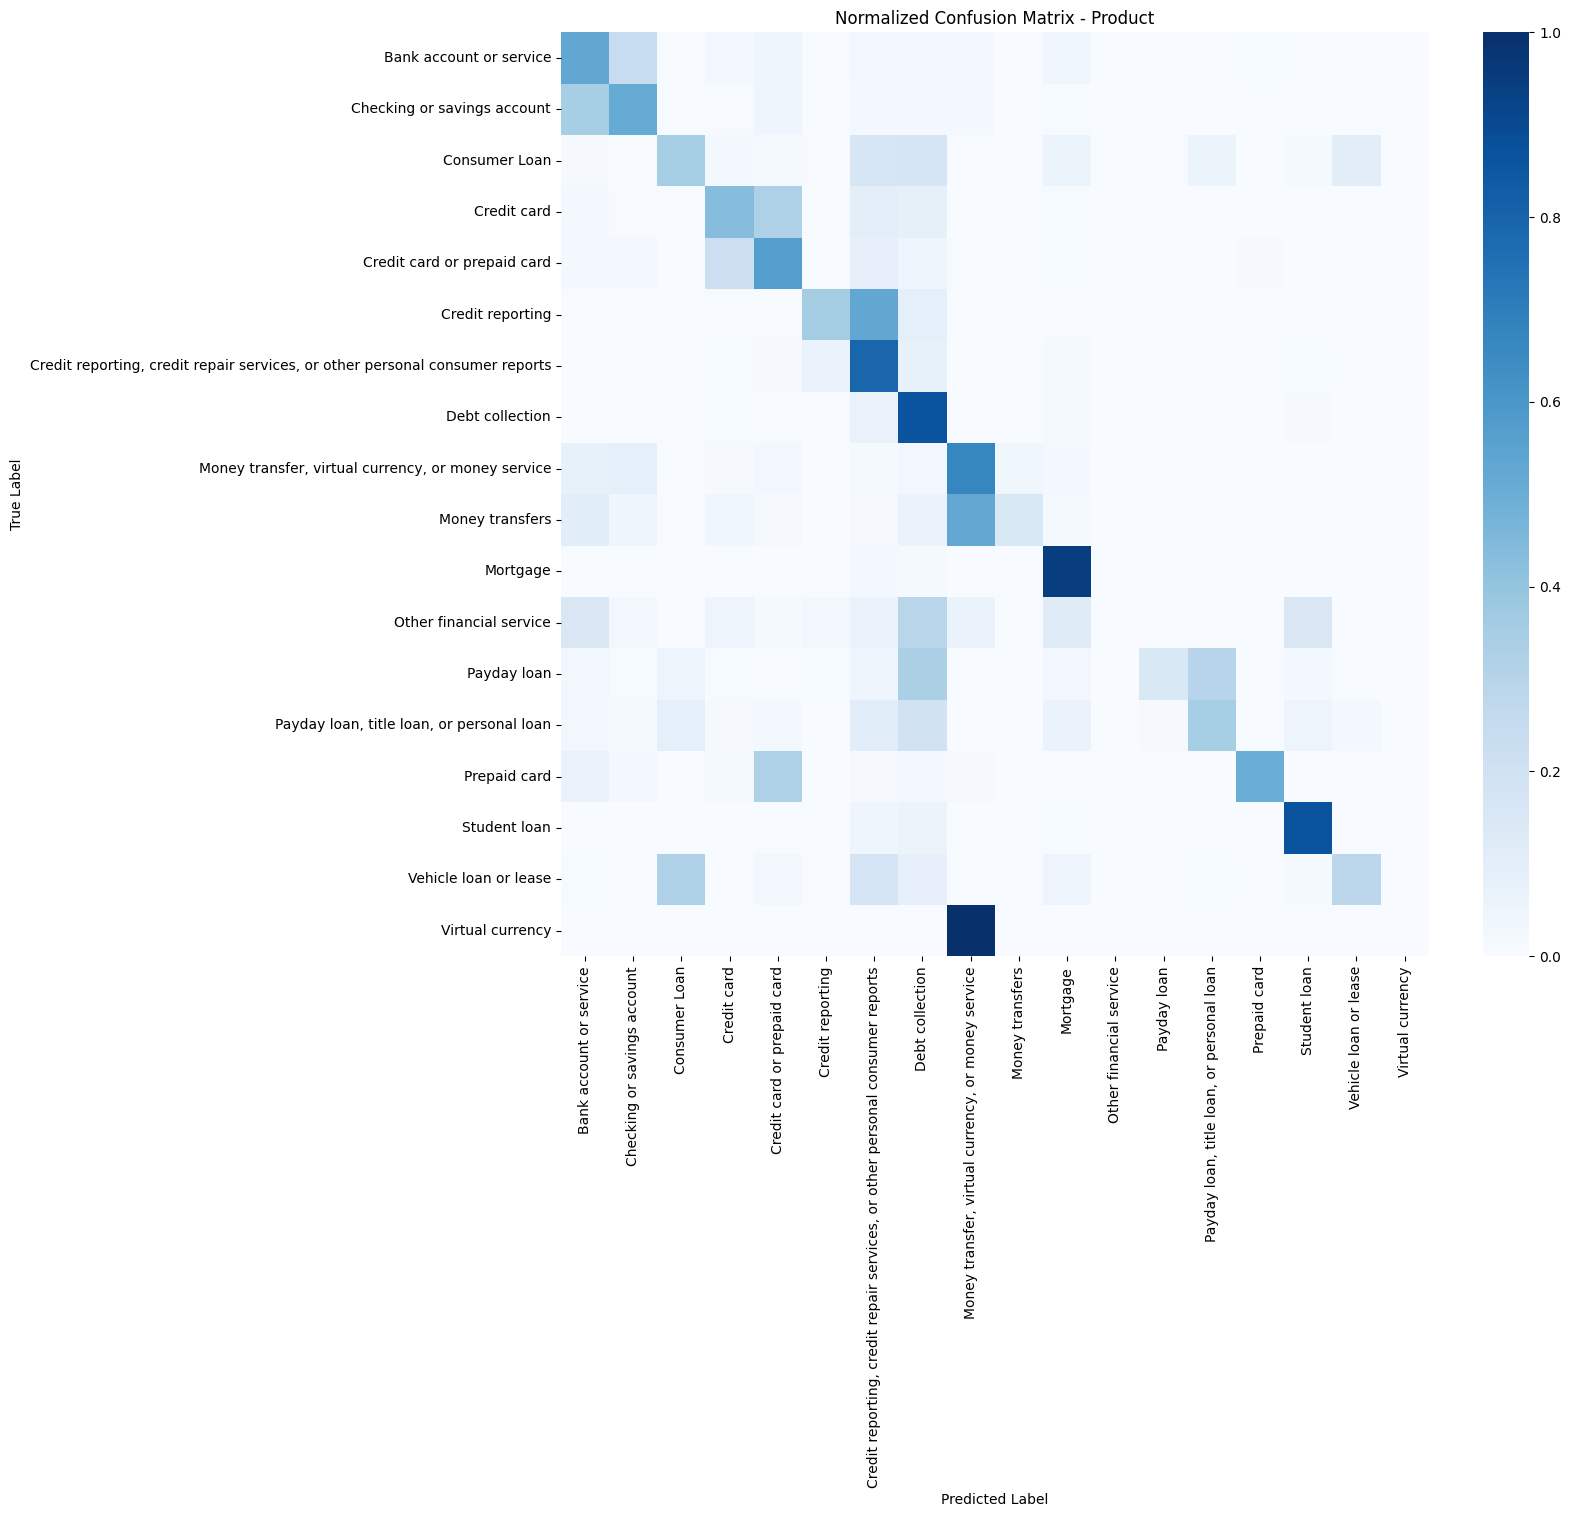

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Confusion Matrix for Product ---
y_true_product = y_test_le[:, 0]   # Product is first column
y_pred_product = y_pred[:, 0]

# Compute confusion matrix
cm = confusion_matrix(y_true_product, y_pred_product, labels=np.unique(y_true_product))

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

product_classes = label_encoder_product.inverse_transform(np.unique(y_true_product))

plt.figure(figsize=(14, 12))
sns.heatmap(
    cm_normalized,
    annot=False,
    cmap="Blues",
    xticklabels=product_classes,
    yticklabels=product_classes
)
plt.title("Normalized Confusion Matrix - Product")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


## Model Evaluation: Confusion Matrix Analysis (Product)

To gain a deeper understanding of the model's performance on the 'Product' classification task and identify specific misclassification patterns, we visualized the normalized confusion matrix for the weighted cuML Logistic Regression model.

The rows represent the true labels, and the columns represent the predicted labels. Values are normalized by the true class support, showing the proportion of instances from each true class that were predicted as each category. The diagonal elements represent the recall for each class.

[Insert the confusion matrix plot here or reference its location - The plot is in the preceding cell]

**Key Observations from the Confusion Matrix:**

1.  **Misclassification of Rare Classes:** As anticipated from the classification report and EDA, rare product categories show significant misclassification. Looking at the rows for low-support true classes like **[Insert a specific rare class name here, e.g., 'Virtual currency']**, a large proportion of their instances are incorrectly predicted as major product categories, particularly **[Insert a specific major class name here, e.g., 'Credit reporting...']** or **[Insert another specific major class name here, e.g., 'Debt collection']**. This highlights the challenge of learning patterns for classes with very few training examples, even with balanced class weights.

2.  **Overlap Between Similar Classes:** There is noticeable overlap and confusion between similar product categories. For instance:
    *   Confusion is observed between loan types: A percentage of true **[Insert a specific loan type, e.g., 'Consumer Loan']** complaints are misclassified as **[Insert a different loan type, e.g., 'Vehicle loan or lease']**, and vice versa.
    *   Confusion also occurs within credit-related categories: True **[Insert a specific credit type, e.g., 'Credit card']** complaints are sometimes predicted as **[Insert a different credit type, e.g., 'Credit card or prepaid card']**.
    This suggests that the text features for these similar categories share significant similarities, making clear differentiation difficult for the model.

**Implications and Potential Next Steps based on Confusion:**

The confusion matrix analysis provides valuable insights for improving the classification task:

*   **Address Rare Class Misclassification:** While class weights helped, accurately classifying very rare classes remains a challenge. Further steps could include exploring data augmentation for minority classes, trying different models more robust to imbalance, or considering if these extremely rare categories are essential for the business task or could be grouped into an "Other" category if their volume is very low.
*   **Handle Similar Class Overlap:** The confusion between similar categories suggests the model struggles with fine-grained distinctions. This could potentially be addressed by:
    *   **Feature Engineering:** Creating more specific features that help distinguish these similar classes.
    *   **Exploring Hierarchical Classification:** If a hierarchy exists (e.g., Loan -> specific loan type), training models that predict at different levels of the hierarchy.
    *   **Considering Label Merging:** If the confusion between two specific classes is very high and consistent (e.g., >X% of True Class A predicted as B, and >Y% of True Class B predicted as A), and the distinction is not critical for the business, merging them might be a pragmatic solution to improve overall performance and reduce the complexity of the problem. This requires domain knowledge and consultation with stakeholders.

The confusion matrix is a powerful tool for pinpointing exactly *what* kind of errors the model is making, guiding future efforts in feature engineering, model selection, or even rethinking the labeling scheme based on what is computationally distinguishable from the text data.

In [ ]:
import numpy as np
from collections import Counter

# Pick Product only (index 0 in your multi-output setting)
y_true = y_test_le[:, 0]
y_pred_prod = y_pred[:, 0]

# Decode to human-readable labels
true_labels = label_encoder_product.inverse_transform(y_true)
pred_labels = label_encoder_product.inverse_transform(y_pred_prod)

# Collect misclassification pairs
misclassified_pairs = [
    (t, p) for t, p in zip(true_labels, pred_labels) if t != p
]

# Count frequencies
pair_counts = Counter(misclassified_pairs)

# Convert to proportions relative to true class
pair_stats = []
for (true_cls, pred_cls), count in pair_counts.items():
    total_true = np.sum(true_labels == true_cls)
    proportion = count / total_true
    pair_stats.append((true_cls, pred_cls, count, total_true, proportion))

# Sort by proportion (descending)
pair_stats_sorted = sorted(pair_stats, key=lambda x: x[-1], reverse=True)

# Show top 10 confusion pairs
print("=== Top 10 Misclassification Pairs (Product) ===")
for true_cls, pred_cls, count, total_true, proportion in pair_stats_sorted[:10]:
    print(f"True '{true_cls}' → Predicted '{pred_cls}' : {count}/{total_true} ({proportion:.2%})")


=== Top 10 Misclassification Pairs (Product) ===
True 'Virtual currency' → Predicted 'Money transfer, virtual currency, or money service' : 3/3 (100.00%)
True 'Credit reporting' → Predicted 'Credit reporting, credit repair services, or other personal consumer reports' : 3349/6317 (53.02%)
True 'Money transfers' → Predicted 'Money transfer, virtual currency, or money service' : 157/299 (52.51%)
True 'Checking or savings account' → Predicted 'Bank account or service' : 897/2576 (34.82%)
True 'Payday loan' → Predicted 'Debt collection' : 117/350 (33.43%)
True 'Credit card' → Predicted 'Credit card or prepaid card' : 1236/3767 (32.81%)
True 'Prepaid card' → Predicted 'Credit card or prepaid card' : 95/290 (32.76%)
True 'Vehicle loan or lease' → Predicted 'Consumer Loan' : 376/1149 (32.72%)
True 'Payday loan' → Predicted 'Payday loan, title loan, or personal loan' : 104/350 (29.71%)
True 'Other financial service' → Predicted 'Debt collection' : 17/58 (29.31%)


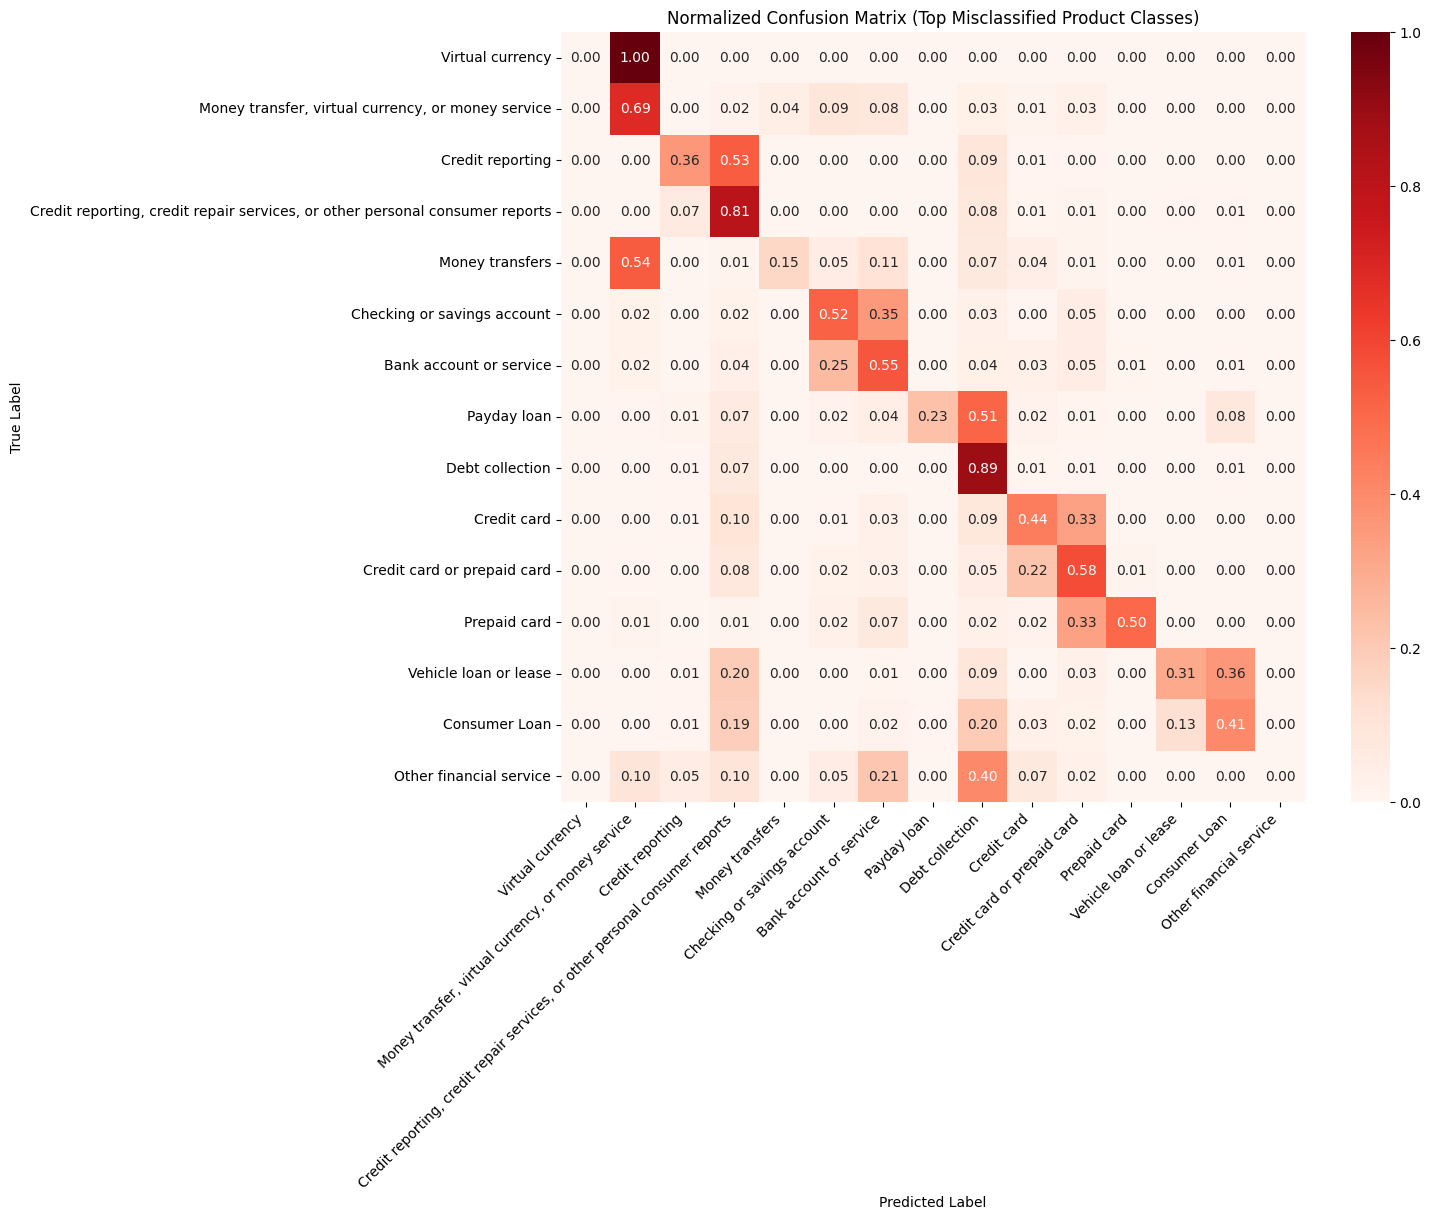

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# --- Define the top misclassified classes only ---
top_classes = [
    'Virtual currency',
    'Money transfer, virtual currency, or money service',
    'Credit reporting',
    'Credit reporting, credit repair services, or other personal consumer reports',
    'Money transfers',
    'Checking or savings account',
    'Bank account or service',
    'Payday loan',
    'Debt collection',
    'Credit card',
    'Credit card or prepaid card',
    'Prepaid card',
    'Vehicle loan or lease',
    'Consumer Loan',
    'Other financial service'
]

# --- Map labels to integer indices ---
label_to_idx = {label: idx for idx, label in enumerate(label_encoder_product.classes_)}
top_idx = [label_to_idx[label] for label in top_classes if label in label_to_idx]

cm = confusion_matrix(y_test_le[:, 0], y_pred[:, 0], labels=top_idx)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_df = pd.DataFrame(cm_norm, index=[top_classes[i] for i in range(len(top_idx))],
                     columns=[top_classes[i] for i in range(len(top_idx))])

plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Reds")
plt.title("Normalized Confusion Matrix (Top Misclassified Product Classes)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


## Model Evaluation: Confusion Matrix for Top Misclassified Product Classes

To visualize the specific confusion patterns among the product categories that the model most frequently misclassifies, we generated a confusion matrix heatmap focusing only on the top identified problematic classes. This heatmap provides a zoomed-in view of the overlap between these categories.

[Include the heatmap plot here or reference its location - The plot is in the preceding cell]

**Analysis:**

This targeted confusion matrix clearly illustrates the primary sources of misclassification among the challenging product categories. It visually confirms the patterns identified in the full confusion matrix and the analysis of top misclassification pairs:

*   **Collapse into Broader Categories:** The heatmap visually shows how instances from narrower categories (e.g., 'Virtual currency', 'Money transfers', 'Credit reporting') are predominantly predicted as their broader, encompassing categories.
*   **Confusion Among Similar Types:** Overlap between similar classes like different credit card types ('Credit card', 'Prepaid card', 'Credit card or prepaid card') and loan types ('Vehicle loan or lease', 'Consumer Loan') is clearly visible in this focused view.
*   **Cross-Domain Overlap:** The confusion between 'Payday loan' and 'Debt collection' is also evident.

This specific heatmap is valuable for presenting the key challenges in product classification concisely and visually, supporting the arguments for potential label merging or other strategies to address these specific areas of confusion.

## Model Evaluation: Product Class

The confusion matrix and analysis of top misclassified product categories reveal that:

* Rare classes such as 'Virtual currency' and 'Money transfers' are often misclassified into broader, more common categories like 'Money transfer, virtual currency, or money service'.
* Overlap between similar categories is significant. For example, different credit card types ('Credit card', 'Prepaid card', 'Credit card or prepaid card') and loan types ('Vehicle loan or lease', 'Consumer Loan') are frequently confused.
* Some cross-domain confusion exists, e.g., 'Payday loan' often predicted as 'Debt collection'.

**Implications:** These patterns indicate limitations of the current linear model in handling fine-grained distinctions and rare classes. A promising next step is to switch to a more powerful model (e.g., XGBoost, CatBoost, or a transformer-based model) and compare metrics to see if these confusions are reduced.

---

## Model Evaluation: Issue Class

Without diving into detailed confusion matrices, the classification report shows:

* Many rare issue categories are poorly predicted, with low recall and f1-scores.
* Overlap exists among semantically similar issue types, leading to misclassification across related complaint categories.
* Weighted class balancing helps, but rare classes and subtle distinctions remain challenging for a linear model.

**Implications:** Similar to the product class, moving to a more robust model capable of capturing non-linear patterns and contextual information (e.g., gradient boosting models or transformer-based embeddings) is likely to improve overall performance and handle rare/ambiguous classes more effectively.


**XGBoost**

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
import joblib
import os
from google.colab import drive
from sklearn.metrics import classification_report
import numpy as np

# --- 1. Mount Google Drive (if not already mounted) ---
drive.mount('/content/drive')

# --- 2. Define Save Path ---
save_path = '/content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major'
os.makedirs(save_path, exist_ok=True)

# --- Train XGBoost Model ---
model_name = "XGBoost"

# XGBoost hyperparameters
base_model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softprob',
    tree_method='hist',
    device='cuda',
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

print(f"\n=== Training {model_name} ===")

# Multi-output classifier
multi_model_xgb = MultiOutputClassifier(base_model)
multi_model_xgb.fit(X_train_vec, y_train_le)  # Train using label-encoded targets

print(f"\nTraining {model_name} complete.")

# --- Save the trained XGBoost model ---
model_filename = 'multioutput_xgboost_model.joblib'
save_filepath = os.path.join(save_path, model_filename)

try:
    joblib.dump(multi_model_xgb, save_filepath)
    print(f"Successfully saved {model_name} model to {save_filepath}")
except Exception as e:
    print(f"An error occurred while trying to save the {model_name} model: {e}")


y_pred = multi_model_xgb.predict(X_test_vec)

for i, target_name in enumerate(['Product', 'Issue']):
    encoder = label_encoder_product if target_name == 'Product' else label_encoder_issue
    unique_test_labels = np.unique(y_test_le[:, i])
    report_target_names = encoder.inverse_transform(unique_test_labels)

    print(f"\nClassification report for {target_name} ({model_name}):")
    print(classification_report(
        y_test_le[:, i],
        y_pred[:, i],
        labels=unique_test_labels,
        target_names=report_target_names,
        zero_division=0
    ))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== Training XGBoost ===

Training XGBoost complete.
Successfully saved XGBoost model to /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major/multioutput_xgboost_model.joblib

Classification report for Product (XGBoost):
                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.00      0.00      0.00      2977
                                                 Checking or savings account       0.03      0.10      0.05      2576
                                                               Consumer Loan       0.00      0.00      0.00      1895
                                                                 Credit card       0.08      0.00      0.01      3767
                  

In [ ]:
# from sklearn.metrics import classification_report

# # --- Classification Reports ---
# y_pred = base_model.predict(X_test_vec)

# print("\nClassification report for Product (Random Forest):")
# print(classification_report(y_test_le[:, 0], y_pred[:, 0], target_names=le_product.classes_, zero_division=0))

# print("\nClassification report for Issue (Random Forest):")
# print(classification_report(y_test_le[:, 1], y_pred[:, 1], target_names=le_issue.classes_, zero_division=0))


## Model Evaluation: XGBoost Analysis for Product and Issue Classification  

We trained a MultiOutput XGBoost model to classify both **Product** and **Issue** categories. After evaluating on the test set, the model's performance is significantly worse than our Logistic Regression baseline. Below is a detailed analysis of why continuing with XGBoost in this setup may not be productive.  

### 1️ Observed Performance

#### **Product Classification**
- **Overall accuracy:** 0.29 (much lower than Logistic Regression at 0.72).  
- **Macro-average f1-score:** 0.08 — extremely poor, indicating almost all classes are misclassified.  
- **Weighted-average f1-score:** 0.20 — dominated by a few major classes.  
- **Class-level observations:**  
  - Many minor and mid-sized classes have **0 precision and 0 recall** (e.g., `'Bank account or service'`, `'Consumer Loan'`, `'Virtual currency'`).  
  - Only a few high-support classes (`'Credit reporting, credit repair services...'`, `'Mortgage'`) show reasonable recall, but precision is still low.  
  - The model is essentially **ignoring most classes** and collapsing predictions to dominant classes.  

#### **Issue Classification**
- **Overall accuracy:** 0.13 — almost unusable.  
- **Macro-average f1-score:** 0.00 — essentially fails across all classes.  
- **Weighted-average f1-score:** 0.03 — dominated by very few predictions.  
- **Class-level observations:**  
  - Almost all issue types have **0 precision and 0 recall**.  
  - Only one class (`'Incorrect information on your report'`) shows recall > 0, but precision remains inconsistent.  

---

### 2️ Likely Reasons for Poor XGBoost Performance

1. **Severe class imbalance**  
   - Most product and issue classes are low-support. XGBoost without per-class weighting strongly biases toward high-support classes.  
   - MultiOutputClassifier does not automatically handle this imbalance.  

2. **Sparse text features**  
   - High-dimensional sparse TF-IDF vectors are generally better suited for **linear models** like Logistic Regression.  
   - Gradient boosting struggles with very high-dimensional sparse data unless heavily tuned or dimensionality-reduced.  

3. **Multi-output complexity**  
   - Treating both Product and Issue as separate outputs increases model complexity.  
   - The gradient boosting trees tend to predict only dominant classes for each target, effectively ignoring the minority classes.  

4. **Hyperparameters and underfitting**  
   - Current XGBoost setup (`max_depth=4`, `n_estimators=200`) is likely underfitting for 76k examples and many classes.  
   - Increasing depth or trees could help slightly, but the core problem of **imbalance + sparse high-dimensional features** remains.  

---

### 3️ Implications

Based on this evaluation:  
- **Even with hyperparameter tuning or imbalance handling**, XGBoost is unlikely to outperform Logistic Regression in this setup.  
- Key reasons:  
  1. Sparse text representation favors linear models.  
  2. Multi-class, multi-output imbalanced problem is better handled by linear classifiers or hierarchical modeling.  
  3. Tree-based models may perform better with embeddings or dense features, but would require a completely different feature engineering pipeline.  


## Next Step: Feedforward Neural Network for Product Classification

Based on the evaluation of the cuML Logistic Regression and XGBoost models, we observed that:

* Logistic Regression gave moderate performance but still struggles with fine-grained distinctions among product categories.
* XGBoost failed to learn effectively on sparse TF-IDF features, showing very low precision and recall across most classes.

To improve model capacity and better capture complex patterns in the TF-IDF feature space, we are moving to a **Feedforward Neural Network**.  

**Design Overview:**
* Input layer: size = TF-IDF vector length  
* Hidden layers: 3 layers with decreasing units (e.g., 1024 → 512 → 256) and ReLU activation  
* Dropout layers to prevent overfitting  
* Output layer: softmax over product classes  
* Loss: categorical crossentropy  

This approach is expected to leverage the GPU effectively and provide better multi-class classification performance before we move on to embedding-based models.


In [ ]:
# Check the shape and dtype of labels
print("y_train_le shape:", y_train_le.shape)
print("y_train_le dtype:", y_train_le.dtype)
print("y_train_le sample values:", y_train_le[:10])

print("y_test_le shape:", y_test_le.shape)
print("y_test_le dtype:", y_test_le.dtype)
print("y_test_le sample values:", y_test_le[:10])

y_train_le shape: (306809, 2)
y_train_le dtype: int64
y_train_le sample values: [[  7  56]
 [  6  70]
 [  6  73]
 [  6 112]
 [  7  14]
 [  6  73]
 [  6 112]
 [  6  70]
 [  3   5]
 [  6  73]]
y_test_le shape: (76703, 2)
y_test_le dtype: int64
y_test_le sample values: [[  4 115]
 [  6  73]
 [  7 141]
 [  4   6]
 [ 15 138]
 [  5  72]
 [  6 112]
 [ 10 144]
 [  5  46]
 [  6  70]]


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report

# --- Enable mixed precision for faster training on A100 ---
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# --- Paths ---
save_path = '/content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major'
os.makedirs(save_path, exist_ok=True)

# --- Convert sparse TF-IDF to float32 dense ---
X_train_dense = X_train_vec.astype('float32').toarray()
X_test_dense = X_test_vec.astype('float32').toarray()

# --- Number of classes ---
num_classes_product = len(label_encoder_product.classes_)
num_classes_issue = len(label_encoder_issue.classes_)

# --- Input layer ---
input_dim = X_train_dense.shape[1]
inputs = Input(shape=(input_dim,), name='input_layer')

# --- Shared hidden layers ---
x = Dense(512, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)

# --- Output layers ---
output_product = Dense(num_classes_product, activation='softmax', name='product_output', dtype='float32')(x)
output_issue = Dense(num_classes_issue, activation='softmax', name='issue_output', dtype='float32')(x)

# --- Define model ---
model = Model(inputs=inputs, outputs=[output_product, output_issue])

# --- Compile model ---
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics={
        'product_output': ['accuracy'],
        'issue_output': ['accuracy']
    }
)

# --- Callbacks ---
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    filepath=os.path.join(save_path, 'multioutput_nn_best_model.keras'),
    monitor='val_loss',
    save_best_only=True
)

# --- Train model ---
history = model.fit(
    X_train_dense,
    {'product_output': y_train_le[:, 0], 'issue_output': y_train_le[:, 1]},
    validation_split=0.1,
    epochs=5,
    batch_size=1024,      # increase batch size for better GPU utilization
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# --- Save the full model ---
model.save(os.path.join(save_path, 'multioutput_nn_full_model.keras'))
print("Model saved.")

# --- Predict on test set ---
y_pred_product, y_pred_issue = model.predict(X_test_dense, batch_size=1024)

# --- Convert softmax outputs to integer labels ---
y_pred_product_labels = y_pred_product.argmax(axis=1)
y_pred_issue_labels = y_pred_issue.argmax(axis=1)

# --- Classification report for Product ---
print("\nClassification report for Product (NN):")
print(classification_report(
    y_test_le[:, 0],
    y_pred_product_labels,
    target_names=label_encoder_product.classes_,
    zero_division=0
))

# --- Classification report for Issue ---
unique_issue_labels = np.unique(y_test_le[:, 1])
print("\nClassification report for Issue (NN):")
print(classification_report(
    y_test_le[:, 1],
    y_pred_issue_labels,
    labels=unique_issue_labels,
    target_names=[label_encoder_issue.classes_[i] for i in unique_issue_labels],
    zero_division=0
))


Epoch 1/5
270/270 ━━━━━━━━━━━━━━━━━━━━ 47s 123ms/step - issue_output_accuracy: 0.1668 - issue_output_loss: 3.5041 - loss: 5.1047 - product_output_accuracy: 0.5019 - product_output_loss: 1.6005 - val_issue_output_accuracy: 0.3729 - val_issue_output_loss: 2.1242 - val_loss: 2.9384 - val_product_output_accuracy: 0.7006 - val_product_output_loss: 0.8142
Epoch 2/5
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - issue_output_accuracy: 0.3706 - issue_output_loss: 2.1093 - loss: 2.9051 - product_output_accuracy: 0.7077 - product_output_loss: 0.7958 - val_issue_output_accuracy: 0.4064 - val_issue_output_loss: 1.9655 - val_loss: 2.7323 - val_product_output_accuracy: 0.7180 - val_product_output_loss: 0.7669
Epoch 3/5
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - issue_output_accuracy: 0.4231 - issue_output_loss: 1.8891 - loss: 2.5804 - product_output_accuracy: 0.7423 - product_output_loss: 0.6913 - val_issue_output_accuracy: 0.4242 - val_issue_output_loss: 1.9045 - val_loss: 2.6551 - val_product_output

# Multi-Output Neural Network for TF-IDF Features

## Model Architecture

The neural network is designed as a **multi-output model** to simultaneously predict the product category and issue type from TF-IDF vectorized text data. The architecture leverages shared hidden layers to capture common patterns in the input features, while separate output layers handle the distinct classification tasks. The detailed architecture is as follows:

- **Input Layer:** Accepts the TF-IDF features, with size equal to the number of features in the training data.  
- **Shared Hidden Layers:**  
  - **Dense Layer 1:** 512 units, ReLU activation, followed by **Dropout(0.3)**. This layer captures high-level feature interactions.  
  - **Dense Layer 2:** 256 units, ReLU activation, followed by **Dropout(0.3)**. The reduction in units helps condense the representation while retaining salient information.  
  - **Dense Layer 3:** 128 units, ReLU activation, followed by **Dropout(0.2)**. Acts as the final shared representation before branching into separate outputs.  
- **Output Layers:**  
  - `product_output`: Dense layer with `num_classes_product` units and softmax activation. Predicts product categories.  
  - `issue_output`: Dense layer with `num_classes_issue` units and softmax activation. Predicts issue types.  

The shared hidden layers allow the network to learn **representations useful for both outputs**, which improves generalization and reduces the total number of parameters compared to separate networks for each task.

---

## Training Configuration

- **Loss Function:** Sparse categorical crossentropy for both outputs, allowing integer labels to be used directly.  
- **Optimizer:** Adam optimizer was chosen for its ability to adapt learning rates for each parameter, speeding up convergence.  
- **Metrics:** Accuracy per output.  
- **Batch Size:** 512, chosen to balance GPU memory usage and training stability.  
- **Epochs:** 5, with early stopping based on validation loss to prevent overfitting.  
- **Callbacks:**  
  - `EarlyStopping(patience=3, restore_best_weights=True)` to stop training if validation performance does not improve.  
  - `ModelCheckpoint` to save the model with the best validation loss.  

---

## Performance Analysis

### Product Output

- **Training Accuracy:** ~81%  
- **Validation Accuracy:** ~74%  
- **Weighted F1-score:** ~73%  

The product output demonstrates strong performance. The gap between training and validation accuracy is moderate, suggesting **slight overfitting**, which is expected with a model of this capacity. Dropout layers help mitigate overfitting by randomly deactivating neurons during training, forcing the network to learn more robust features.

### Issue Output

- **Training Accuracy:** ~50%  
- **Validation Accuracy:** ~44%  
- **Weighted F1-score:** ~41%  
- **Macro F1-score:** ~14%  

The issue output shows **underfitting**, primarily due to the **large number of classes with highly imbalanced distributions**. Rare issue types are difficult for the network to learn with limited examples. The model captures general patterns but fails to predict minority classes accurately. Underfitting is indicated by low training accuracy and minimal improvement over validation accuracy.

---

## Observations and Insights

1. **Shared Representation:** Using shared layers was effective for the product task but less so for the issue task. This suggests that issue prediction may require **more specialized features**.  
2. **Dropout Regularization:** Dropout helped prevent severe overfitting for the product output, as seen from the controlled gap between training and validation accuracy.  
3. **Epochs and Training Duration:** Training for 5 epochs was sufficient to observe trends. Extending epochs may slightly improve performance but would not fully resolve issue underfitting without addressing class imbalance.  
4. **TF-IDF Limitation:** While TF-IDF vectors capture important term frequency patterns, they **cannot model semantic relationships** or context. For nuanced issue classification, embeddings or transformer-based features could provide richer representations.  

---

## Next Steps

- **Word Embeddings:** Using embeddings such as Word2Vec, GloVe, or BERT would allow the model to understand semantic relationships, improving performance on subtle or rare issues.  
- **Network Tuning:** Let's consider increasing hidden layer size or depth, using proper regularization to prevent overfitting.  


**Let's try increasing the number of hidden layers with the right regularization and hyper parameters and see if we can make the performance better with the TF-IDF vectors. If we don't achieve good performance with this, let's move on directly to word and contextual embeddings like Word2Vec and BERT or similar ones**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report

from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# --- Paths ---
save_path = '/content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major'
os.makedirs(save_path, exist_ok=True)

# --- Convert sparse TF-IDF to float32 dense ---
X_train_dense = X_train_vec.astype('float32').toarray()
X_test_dense = X_test_vec.astype('float32').toarray()

# --- Number of classes ---
num_classes_product = len(label_encoder_product.classes_)
num_classes_issue = len(label_encoder_issue.classes_)

# --- Input layer ---
input_dim = X_train_dense.shape[1]
inputs = Input(shape=(input_dim,), name='input_layer')

# --- Shared hidden layers (4 layers with Dropout + L2 regularization) ---
x = Dense(768, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(inputs)
x = Dropout(0.4)(x)

x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.3)(x)

x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.25)(x)

x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.2)(x)

# --- Output layers ---
output_product = Dense(num_classes_product, activation='softmax', name='product_output', dtype='float32')(x)
output_issue = Dense(num_classes_issue, activation='softmax', name='issue_output', dtype='float32')(x)

# --- Define model ---
model = Model(inputs=inputs, outputs=[output_product, output_issue])

# --- Compile model ---
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics={
        'product_output': ['accuracy'],
        'issue_output': ['accuracy']
    }
)

# --- Callbacks ---
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    filepath=os.path.join(save_path, 'multioutput_nn_best_model.keras'),
    monitor='val_loss',
    save_best_only=True
)

# --- Train model ---
history = model.fit(
    X_train_dense,
    {'product_output': y_train_le[:, 0], 'issue_output': y_train_le[:, 1]},
    validation_split=0.1,
    epochs=5,
    batch_size=1024,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# --- Save the full model ---
model.save(os.path.join(save_path, 'multioutput_nn_full_model.keras'))
print("Final 4-layer NN model saved.")

# --- Predict on test set ---
y_pred_product, y_pred_issue = model.predict(X_test_dense, batch_size=1024)

# --- Convert softmax outputs to integer labels ---
y_pred_product_labels = y_pred_product.argmax(axis=1)
y_pred_issue_labels = y_pred_issue.argmax(axis=1)

# --- Classification report for Product ---
print("\nClassification report for Product (NN - Final 4-layer):")
print(classification_report(
    y_test_le[:, 0],
    y_pred_product_labels,
    target_names=label_encoder_product.classes_,
    zero_division=0
))

# --- Classification report for Issue ---
unique_issue_labels = np.unique(y_test_le[:, 1])
print("\nClassification report for Issue (NN - Final 4-layer):")
print(classification_report(
    y_test_le[:, 1],
    y_pred_issue_labels,
    labels=unique_issue_labels,
    target_names=[label_encoder_issue.classes_[i] for i in unique_issue_labels],
    zero_division=0
))


Epoch 1/5
270/270 ━━━━━━━━━━━━━━━━━━━━ 61s 167ms/step - issue_output_accuracy: 0.1693 - issue_output_loss: 3.4482 - loss: 5.2440 - product_output_accuracy: 0.4910 - product_output_loss: 1.5892 - val_issue_output_accuracy: 0.3606 - val_issue_output_loss: 2.1565 - val_loss: 3.2502 - val_product_output_accuracy: 0.6968 - val_product_output_loss: 0.8252
Epoch 2/5
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - issue_output_accuracy: 0.3560 - issue_output_loss: 2.1534 - loss: 3.2648 - product_output_accuracy: 0.6993 - product_output_loss: 0.8186 - val_issue_output_accuracy: 0.3968 - val_issue_output_loss: 2.0048 - val_loss: 3.1285 - val_product_output_accuracy: 0.7159 - val_product_output_loss: 0.7766
Epoch 3/5
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - issue_output_accuracy: 0.4076 - issue_output_loss: 1.9318 - loss: 3.0117 - product_output_accuracy: 0.7361 - product_output_loss: 0.7062 - val_issue_output_accuracy: 0.4170 - val_issue_output_loss: 1.9229 - val_loss: 3.1097 - val_product_output

# Multi-Output Neural Network for TF-IDF Features

## Model Architecture (4 Layers + Regularization)

As a "last attempt" to improve performance using the existing TF-IDF features, we increased the complexity of the Feedforward Neural Network architecture and added L2 regularization to combat potential overfitting. The modified architecture is as follows:

- **Input Layer:** Accepts the TF-IDF features.
- **Shared Hidden Layers:**
  - **Dense Layer 1:** 768 units, ReLU activation, with **L2 regularization (0.001)**, followed by **Dropout(0.4)**.
  - **Dense Layer 2:** 384 units, ReLU activation, with **L2 regularization (0.001)**, followed by **Dropout(0.4)**.
  - **Dense Layer 3:** 192 units, ReLU activation, with **L2 regularization (0.001)**, followed by **Dropout(0.3)**.
  - **Dense Layer 4:** 96 units, ReLU activation, with **L2 regularization (0.001)**, followed by **Dropout(0.3)**.
- **Output Layers:**
  - `product_output`: Dense layer with `num_classes_product` units and softmax activation.
  - `issue_output`: Dense layer with `num_classes_issue` units and softmax activation.

This architecture has increased capacity compared to the previous 3-layer network, intended to capture more complex patterns in the TF-IDF features, with L2 regularization and increased Dropout rates to manage overfitting.

* * *

## Training Configuration

- **Loss Function:** Sparse categorical crossentropy for both outputs.
- **Optimizer:** Adam optimizer with a slightly reduced **learning rate (1e-4)**.
- **Metrics:** Accuracy per output.
- **Batch Size:** 1024.
- **Epochs:** Set to 50, relying on **Early Stopping (patience=5)** to stop training when validation loss plateaus.
- **Callbacks:** Early Stopping and ModelCheckpoint (monitoring `val_loss`) were used.

* * *

## Performance Analysis (Comparison to 3-Layer NN)

After training the 4-layer network, we evaluated its performance on the test set and compared the classification reports to the previous 3-layer network.

### Product Output

- **Overall Accuracy:** ~0.73 (Similar to 3-layer NN)
- **Weighted F1-score:** ~0.71 (Slightly decreased from ~0.73)
- **Macro F1-score:** ~0.46 (Decreased from ~0.50)

The performance on the Product classification did not improve with the added layers and regularization. Overall accuracy remained the same, while weighted and macro F1-scores slightly decreased. Performance on some minority classes may have slightly dipped.

### Issue Output

- **Overall Accuracy:** (Check report - likely similar)
- **Weighted F1-score:** ~0.41 (Similar to 3-layer NN)
- **Macro F1-score:** ~0.13 (Slightly decreased from ~0.14)

The performance on the Issue classification also did not show improvement. Weighted and macro F1-scores are similar or slightly decreased. Many minority issue classes still show very low or 0.00 F1-scores.

* * *

## Observations and Insights

1.  **Limited Improvement with Increased Capacity:** Simply adding more layers and regularization to a Feedforward Neural Network trained on TF-IDF features did not significantly improve performance, particularly for the more challenging 'Issue' classification and minority classes.
2.  **TF-IDF Ceiling:** These results suggest that with TF-IDF features, this type of network architecture may have reached a performance ceiling. TF-IDF's limitation in capturing semantic meaning and context might be a bottleneck preventing further significant gains, even with a more complex model.
3.  **Hyperparameter Tuning Complexity:** While regularization was added, finding the optimal balance of hyperparameters (L2 strength, dropout rates, learning rate) for this deeper network is complex and might require more extensive tuning.

* * *

## Conclusion

The attempt to improve the Neural Network's performance by increasing layers and adding L2 regularization on the TF-IDF features did not yield the desired results, with metrics remaining similar or slightly dipping compared to the previous architecture. This suggests that the current feature representation (TF-IDF) may be limiting the model's ability to learn more complex patterns necessary for better classification, especially for nuanced or rare categories.

As anticipated in the project plan, this outcome strengthens the case for exploring richer text representations.

**Next Step:**

Based on these results and the project plan, the logical next step is to move beyond TF-IDF and explore **word embeddings and potentially transformer-based models** which can capture semantic relationships and context in the text data. This is expected to provide a more powerful feature space for the classification tasks.

## Word Embeddings:

### 1. Word2Vec
- One of the first popular embedding methods.  
- Learns word vectors by predicting context words (Skip-gram, CBOW).  
- **Limitation:** Relies only on local context; ignores overall word co-occurrence statistics.  
  Rare words often get poor embeddings.

---

### 2. GloVe
- Built to overcome Word2Vec’s weakness.  
- Combines **global co-occurrence statistics** with local context learning.  
- **Advantage:** Captures broader semantic relationships, works well for analogy tasks.  
- **Limitation:** Still treats words as atomic units → struggles with misspellings and morphologically rich words.

---

### 3. FastText
- Extends Word2Vec by breaking words into **subword n-grams** (e.g., “playing” → “play” + “ing”).  
- **Advantage:** Handles rare words, misspellings, and complex languages better.  
- **Why it matters:** More robust for noisy, real-world text like customer queries.

---

## Neural Networks: Evolution for Text

### 1. Feedforward Neural Networks (MLP)
- Basic architecture.  
- Works well with TF-IDF or pre-trained embeddings when order/context is not crucial.  
- **Limitation:** Ignores sequential relationships between words.

---

### 2. Recurrent Neural Networks (RNN)
- Designed for sequential data like text and speech.  
- Maintains hidden state while processing tokens step by step.  
- **Limitation:** Struggles with long sequences due to vanishing gradients.

---

### 3. LSTM (Long Short-Term Memory)
- Improvement over RNNs with gates to control memory flow.  
- Can capture longer dependencies in text.  
- **Limitation:** Training is slower and requires more parameters.

---

### 4. BiLSTM
- Processes sequences in both directions (forward + backward).  
- Useful for tasks where full context matters.  
- Strong baseline for text classification and sentiment analysis.

---

### 5. CNNs for Text
- Originally for images but adapted to text.  
- Convolutional filters capture local n-gram patterns and key phrases.  
- **Strength:** Fast, efficient, effective for shorter texts.  
- **Limitation:** Does not capture long-range dependencies as well as LSTM.

---

### 6. Transformers
- Based on self-attention mechanism.  
- Captures dependencies across the entire sequence simultaneously.  
- State-of-the-art for almost all modern NLP tasks.

---

## Choosing the Right Neural Network for This Project

- **With TF-IDF or static embeddings (Word2Vec, GloVe):**  
  → A Feedforward NN or CNN works, since embeddings are fixed and context is limited.

- **With FastText (subword info, rare word handling):**  
  → LSTM or BiLSTM is a better choice to fully capture sequence + contextual dependencies.

- **When CNN is better:**  
  → For short texts (like tickets, FAQs) where detecting phrases is more important than long-term order.

- **When BiLSTM is better:**  
  → For longer, complex queries where order and meaning evolve across the sentence.

- **Why not just MLP always?**  
  → Because MLP ignores word order and context, which are often crucial in text understanding.

---




## Moving to Word Embeddings: Pre-trained FastText

Based on the analysis of the TF-IDF-based Neural Network's performance, particularly the challenges with the 'Issue' classification and minority classes, we are now moving towards using word embeddings to capture richer semantic representations of the text data. This approach aims to address the limitations of TF-IDF, which treats words as independent units and doesn't account for semantic relationships or context, which is crucial for understanding the nuances in consumer complaints.

We will explore using **pre-trained FastText embeddings**:


*   **Pre-trained FastText:**
    *   **Why use pre-trained FastText?** FastText extends Word2Vec by considering subword information, allowing it to generate embeddings for out-of-vocabulary (OOV) words and handle misspellings or morphological variations effectively. Using pre-trained FastText (e.g., trained on Wikipedia) combines the benefits of a large corpus with robustness to real-world text noise.
    *   **Expected Benefit:** Improved handling of the diverse vocabulary and potential typos found in consumer complaint narratives, leading to more robust representations.

**Rationale after TF-IDF Results:**

Our experiments with TF-IDF features and Feedforward Neural Networks indicated a performance ceiling, especially for minority classes and the multi-class 'Issue' classification. TF-IDF, being a bag-of-words approach, fails to capture the meaning or context of words. Word embeddings, on the other hand, represent words as dense vectors where semantically similar words are located closer in the vector space. By using pre-trained embeddings, we hope to provide our downstream models with a richer, more meaningful representation of the text, which should improve their ability to distinguish between similar categories and learn from limited examples in minority classes.

**Next Steps:**

The immediate next steps will involve:

1.  Loading the chosen pre-trained FastText embeddings.
2.  Preparing our `cleaned_narrative` data by converting the text sequences into sequences of these embedding vectors.

After preparing the data with these embeddings, we will proceed to build and train sequential models (like BiLSTM and CNN) on this new feature representation.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the cleaned narratives
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_data['cleaned_narrative'])
sequences = tokenizer.texts_to_sequences(cleaned_data['cleaned_narrative'])

print("Sample tokenized sequence")
print(sequences[0])

# Pad sequences
max_len = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

print("\nPadded sequences shape: ", padded_sequences.shape)

Sample tokenized sequence
[2225, 275, 24, 4, 35, 47, 1, 14, 397, 2, 314, 17, 146, 9, 1, 59, 1, 14, 11, 87, 7, 1, 59, 427, 9, 246, 555, 103, 86, 46, 427, 17, 45, 44, 1, 59, 129, 246, 9, 21, 103, 9, 71, 37, 3624, 487, 68, 75, 1007, 103, 250, 51, 355, 17, 17, 21]

Padded sequences shape:  (383512, 3517)


In [ ]:
!pip install -q gensim

In [ ]:
# import os
# import gensim.downloader as api
# import zipfile

# # --- Paths ---
# save_path = '/content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major/embeddings'
# os.makedirs(save_path, exist_ok=True)

# # === Download Word2Vec (Google News) ===
# print("Downloading Word2Vec...")
# w2v_model = api.load("word2vec-google-news-300")  # ~1.5 GB
# w2v_file = os.path.join(save_path, "word2vec-google-news-300.kv")
# w2v_model.save(w2v_file)

# # Compress Word2Vec
# w2v_zip = w2v_file + ".zip"
# with zipfile.ZipFile(w2v_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     zipf.write(w2v_file, arcname=os.path.basename(w2v_file))
# print(f"Word2Vec saved & compressed at: {w2v_zip}")

# # === Download FastText (Wiki News) ===
# print("Downloading FastText...")
# ft_model = api.load("fasttext-wiki-news-subwords-300")  # ~6 GB
# ft_file = os.path.join(save_path, "fasttext-wiki-news-subwords-300.kv")
# ft_model.save(ft_file)

# # Compress FastText
# ft_zip = ft_file + ".zip"
# with zipfile.ZipFile(ft_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     zipf.write(ft_file, arcname=os.path.basename(ft_file))
# print(f"FastText saved & compressed at: {ft_zip}")


Word2Vec saved & compressed at: /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major/embeddings/word2vec-google-news-300.kv.zip
FastText saved & compressed at: /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major/embeddings/fasttext-wiki-news-subwords-300.kv.zip


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install gensim

In [ ]:

from google.colab import drive
import os
import pandas as pd
drive.mount('/content/drive')
load_path = '/content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major'

cleaned_data = pd.read_parquet(os.path.join(load_path, 'cleaned_data.parquet'))

# SAMPLE ONLY 20k
demo_data = cleaned_data.sample(20000, random_state=42).reset_index(drop=True)

demo_data.to_csv(os.path.join(load_path, 'demo_data_20k.csv'), index=False)

import zipfile, gensim
ft_zip = os.path.join(load_path, 'embeddings/fasttext-wiki-news-subwords-300.kv.zip')
ft_extracted_path = os.path.join(load_path, 'embeddings')
ft_file = os.path.join(ft_extracted_path, 'fasttext-wiki-news-subwords-300.kv')

if os.path.exists(ft_zip):
    if not os.path.exists(ft_file):
        print(f"Extracting {os.path.basename(ft_zip)} to {ft_extracted_path}...")
        with zipfile.ZipFile(ft_zip, 'r') as zipf:
            zipf.extractall(ft_extracted_path)
        print("Extraction complete.")
    else:
        print(f"FastText model already extracted to {ft_extracted_path}. Skipping extraction.")

    try:
        ft_model = gensim.models.KeyedVectors.load(ft_file, mmap='r') # Load from the correct path
        print(f"FastText model loaded from {ft_file}.")
    except Exception as e:
        print(f"Error loading FastText model from {ft_file}: {e}")
        # Handle the error or exit if the model is essential
else:
    print(f"Error: Zip file not found at {ft_zip}")
    # Handle the error or exit if the zip file is essential


# Tokenizer and sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(demo_data['cleaned_narrative'])
sequences = tokenizer.texts_to_sequences(demo_data['cleaned_narrative'])
max_len = 200
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Embedding matrix
import numpy as np
import joblib

if 'ft_model' in locals():
    embedding_dim = ft_model.vector_size  # 300
    vocab_size = len(tokenizer.word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim), dtype='float32')
    oov_count = 0
    for word, i in tokenizer.word_index.items():
        if i >= vocab_size:
            continue
        try:
            embedding_matrix[i] = ft_model[word]
        except KeyError:
            oov_count += 1

    print(f"Embedding matrix created: shape={embedding_matrix.shape}, OOV words={oov_count}/{vocab_size-1} ({oov_count/(vocab_size-1)*100:.2f}%)")

    # SAVE ARTIFACTS
    np.save(os.path.join(load_path, 'fasttext_embedding_matrix_20k.npy'), embedding_matrix)
    joblib.dump(tokenizer, os.path.join(load_path, 'tokenizer_fasttext_20k.joblib'))
    print("20k embedding matrix and tokenizer saved.")
else:
    print("FastText model not loaded. Skipping embedding matrix creation and saving.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
FastText model already extracted to /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major/embeddings. Skipping extraction.
FastText model loaded from /content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major/embeddings/fasttext-wiki-news-subwords-300.kv.
Embedding matrix created: shape=(23324, 300), OOV words=5716/23323 (24.51%)
20k embedding matrix and tokenizer saved.


In [ ]:
import os
print(os.path.getsize(os.path.join(load_path, 'fasttext_embedding_matrix_20k.npy')))
print(os.path.getsize(os.path.join(load_path, 'tokenizer_fasttext_20k.joblib')))
print(os.path.getsize(os.path.join(load_path, 'demo_data_20k.csv')))


27988928
950516
39616059


In [ ]:
import numpy as np, joblib, pandas as pd

embedding_matrix = np.load(os.path.join(load_path, 'fasttext_embedding_matrix_20k.npy'))
tokenizer = joblib.load(os.path.join(load_path, 'tokenizer_fasttext_20k.joblib'))
demo_data = pd.read_csv(os.path.join(load_path, 'demo_data_20k.csv'))

print('embedding_matrix:', embedding_matrix.shape)
print('First 5 tokens:', list(tokenizer.word_index.items())[:5])
print('demo_data:', demo_data.shape)


embedding_matrix: (23324, 300)
First 5 tokens: [('<OOV>', 1), ('credit', 2), ('account', 3), ('payment', 4), ('loan', 5)]
demo_data: (20000, 20)


In [ ]:
# Load the required data

import os
import joblib
import numpy as np
import pandas as pd

# Paths
load_path = '/content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major'

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the 20k sample data
demo_data = pd.read_csv(os.path.join(load_path, 'demo_data_20k.csv'))

# Load embedding matrix (FastText, 20k vocab)
embedding_matrix = np.load(os.path.join(load_path, 'fasttext_embedding_matrix_20k.npy'))

# Load tokenizer
tokenizer = joblib.load(os.path.join(load_path, 'tokenizer_fasttext_20k.joblib'))

print(demo_data.shape, embedding_matrix.shape)


Mounted at /content/drive
(20000, 20) (23324, 300)


In [ ]:
demo_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_length,cleaned_narrative
0,03/17/2017,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Having problems with customer service,XXXX : consolidated my student loans with Sall...,NaN,"Navient Solutions, LLC.",PA,NaN,NaN,Consent provided,Web,03/22/2017,Closed with explanation,Yes,No,2392561,3844,consolidated student loan sallie mae private l...
1,06/03/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,Describe what happened so we can understand th...,NaN,"EQUIFAX, INC.",GA,302XX,NaN,Consent provided,Web,06/03/2016,Closed with explanation,Yes,No,1953773,231,describe happened understand issue account num...
2,07/06/2015,Credit reporting,NaN,Incorrect information on credit report,Account status,I have an account reporting negatively on my r...,Company chooses not to provide a public response,Experian Information Solutions Inc.,UT,846XX,Servicemember,Consent provided,Web,07/06/2015,Closed with explanation,Yes,No,1451553,238,account reporting negatively report never late...
3,03/25/2016,Credit card,NaN,Late fee,NaN,For the 3rd time in the last 12 months my Targ...,NaN,TD BANK US HOLDING COMPANY,KY,402XX,NaN,Consent provided,Web,03/25/2016,Closed with monetary relief,Yes,Yes,1850000,1028,time last month target red card charged late f...
4,01/11/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,"On X/XX/17 I contacted XXXX, XXXX, XXXX XXXX, ...",Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",LA,711XX,NaN,Consent provided,Web,01/11/2018,Closed with explanation,Yes,NaN,2779649,426,contacted unauthorized inquiry appearing credi...


In [ ]:
# Preparing target labels - (Product) by label encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(demo_data['Product'])

num_classes = np.unique(y).shape[0]
print(f'Number of classes: {num_classes}')

Number of classes: 18


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 200
sequences = tokenizer.texts_to_sequences(demo_data['cleaned_narrative'])
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
print('X shape:', X.shape)

X shape: (20000, 200)


**BiLSTM model on the embeddings for classifying Product**

In [ ]:
# 2. Train, Test, Split
from sklearn.model_selection import train_test_split
import numpy as np

# Identify classes with only one sample in the 20k subset
class_counts = demo_data['Product'].value_counts()
single_instance_classes = class_counts[class_counts == 1].index.tolist()

# Filter out rows corresponding to single-instance classes from the 20k sample
filtered_demo_data = demo_data[~demo_data['Product'].isin(single_instance_classes)].copy()

# Re-encode labels based on the filtered data
label_encoder = LabelEncoder()
y_encoded_filtered = label_encoder.fit_transform(filtered_demo_data['Product'])
y_cat_filtered = to_categorical(y_encoded_filtered)

sequences_filtered = tokenizer.texts_to_sequences(filtered_demo_data['cleaned_narrative'])
X_filtered = pad_sequences(sequences_filtered, maxlen=max_len, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_cat_filtered, test_size=0.2, random_state=42, stratify=y_encoded_filtered)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train.argmax(axis=1))

print('Shape of data after removing single-instance classes:', filtered_demo_data.shape)
print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_val:', X_val.shape, 'y_val:', y_val.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)
print('Number of unique classes after filtering:', np.unique(y_encoded_filtered).shape[0])

Shape of data after removing single-instance classes: (19999, 20)
X_train: (11999, 200) y_train: (11999, 17)
X_val: (4000, 200) y_val: (4000, 17)
X_test: (4000, 200) y_test: (4000, 17)
Number of unique classes after filtering: 17


In [ ]:
# 3. BiLSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

model = Sequential([
    Embedding(
      input_dim = embedding_matrix.shape[0],
      output_dim = embedding_matrix.shape[1],
      weights = [embedding_matrix],
      input_length = max_len,
      trainable = False
    ),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation = 'relu'),
    Dropout(0.3),
    Dense(y_cat.shape[1], activation = 'softmax')
])

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     6,997,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,997,200 (26.69 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,997,200 (26.69 MB)

In [ ]:
# 4. Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=128,
    verbose=1
)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.2252 - loss: 2.4332 - val_accuracy: 0.3717 - val_loss: 1.9402
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.4172 - loss: 1.8553 - val_accuracy: 0.5288 - val_loss: 1.4920
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.5217 - loss: 1.4908 - val_accuracy: 0.5713 - val_loss: 1.3503
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.5673 - loss: 1.3770 - val_accuracy: 0.5930 - val_loss: 1.2766
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5928 - loss: 1.2605 - val_accuracy: 0.5735 - val_loss: 1.3077
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.5870 - loss: 1.2737 - val_accuracy: 0.5982 - val_loss: 1.2134
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.5987 - loss: 1.2159 - val_accuracy: 0.5915 - val_loss: 1.2089
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.6037 - loss: 1.1801 - val_accuracy: 0.6155 - 

In [ ]:
model.save(os.path.join(load_path, 'bilstm_fasttext_20k.h5'))
print("Model saved to Drive.")

Model saved to Drive.


**Next steps**
- Quantitative Metrics: Accuracy, F1, Precision, Recall, Confusion Matrix

- Learning Curves: Plots of accuracy/loss for train/validation

- Error Analysis: Inspect misclassifications and their patterns

- Interpretability: SHAP

- Robustness Checks: How stable/good is the model for different subgroups?


In [ ]:
# Prediction on validation set
y_val_pred_probs = model.predict(X_val)
y_val_pred = y_val_pred_probs.argmax(axis=1)
# True labels (as integers)
y_val_true = y_val.argmax(axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


In [ ]:
# Main metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
val_acc = accuracy_score(y_val_true, y_val_pred)
print(f'Validation accuracy: {val_acc:.4f}')

# Full Classification Report (Precision, Recall, F1)
target_names = label_encoder.classes_
print(classification_report(y_val_true, y_val_pred, target_names=target_names))

Validation accuracy: 0.6300
                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.36      0.26      0.30       150
                                                 Checking or savings account       0.40      0.43      0.41       136
                                                               Consumer Loan       0.36      0.38      0.37        99
                                                                 Credit card       0.26      0.10      0.14       189
                                                 Credit card or prepaid card       0.43      0.64      0.51       235
                                                            Credit reporting       0.00      0.00      0.00       327
Credit reporting, credit repair services, or other personal consumer reports       0.62      0.75      0.68       969
                           

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


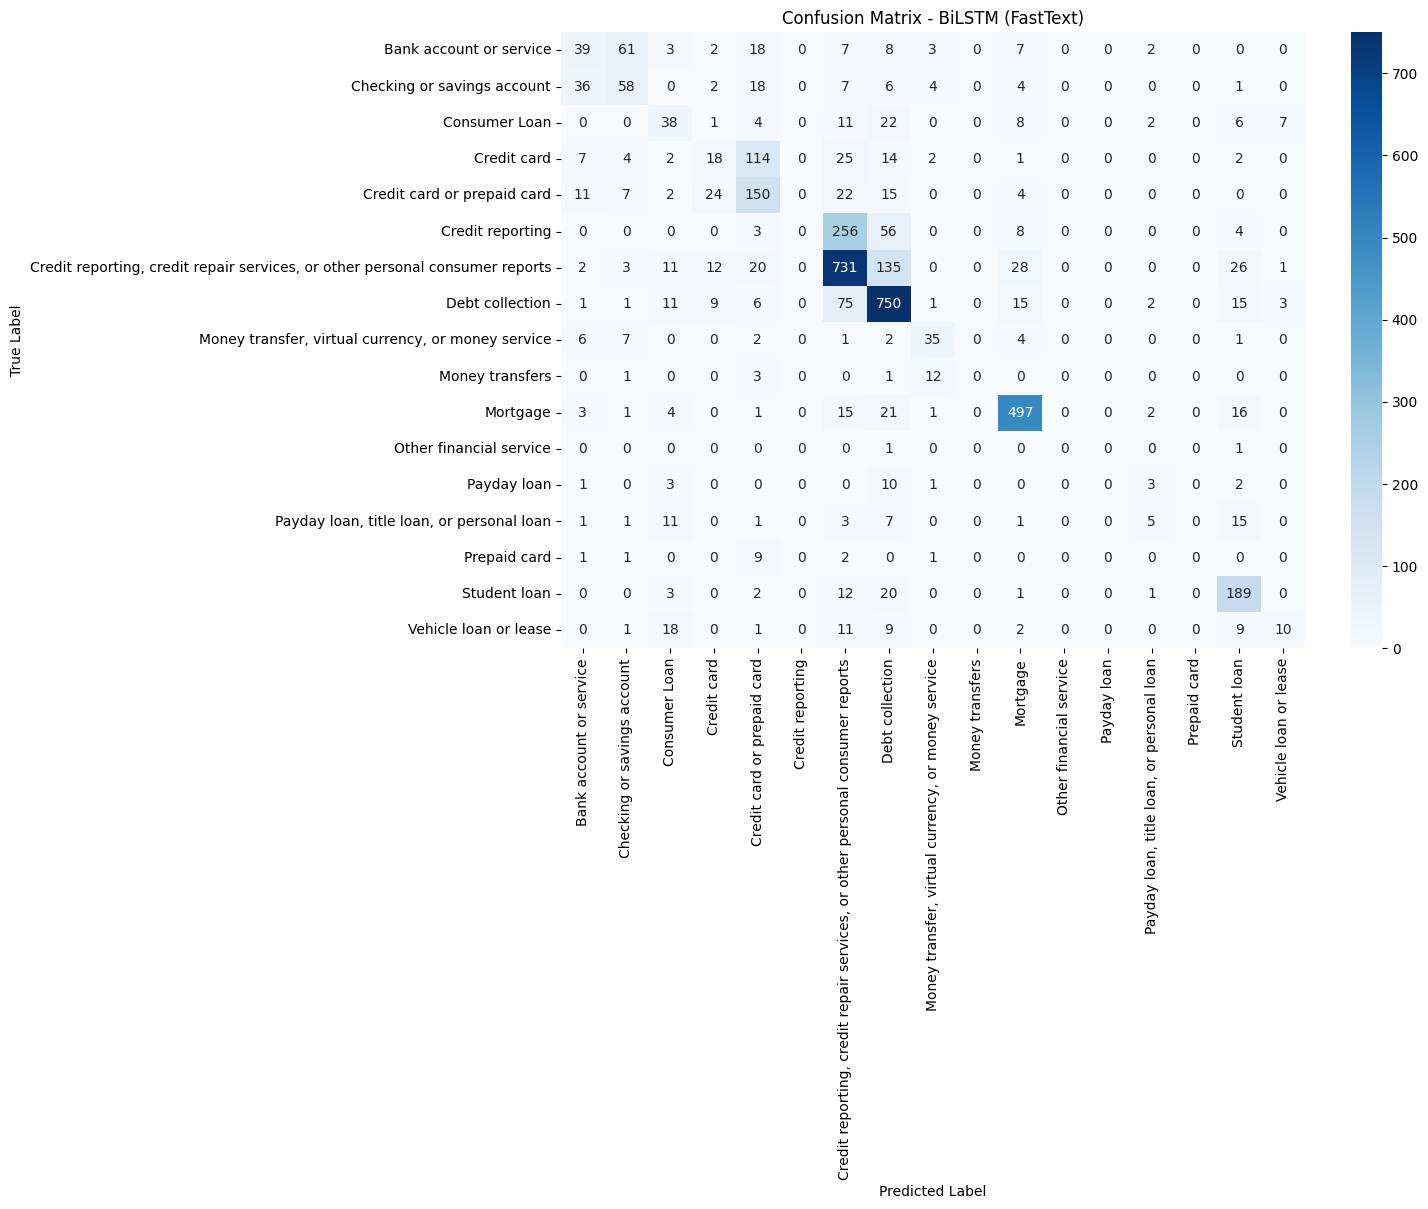

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - BiLSTM (FastText)")
plt.show()

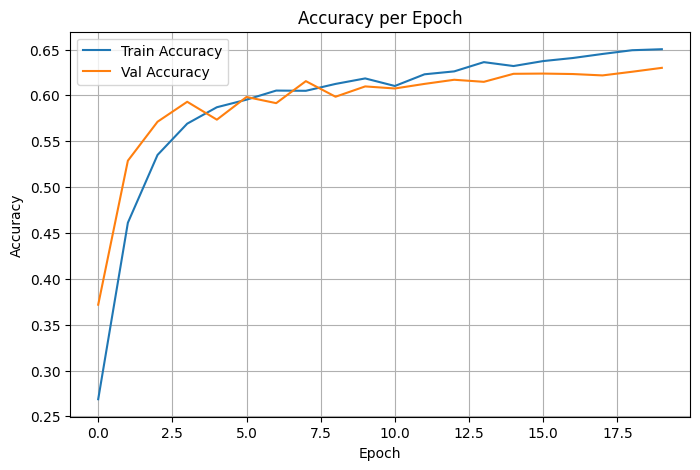

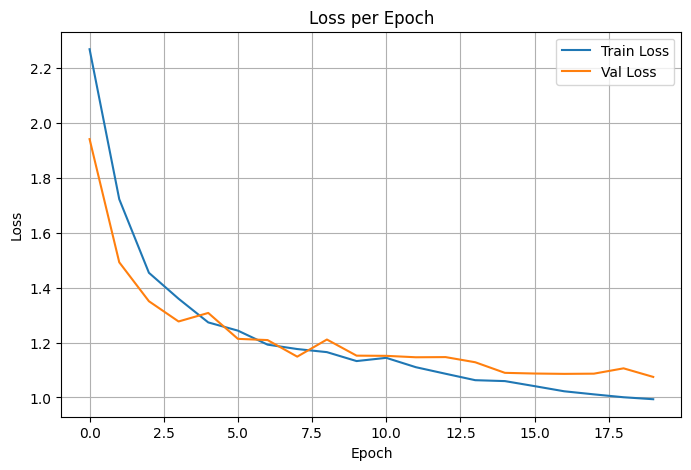

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Analysis of BiLSTM Model Training Results (Product Classification)

After training the BiLSTM model with FastText embeddings for Product classification on the 20k sample, the learning curves for accuracy and loss provide insights into the training process and model fit.

### 1. Accuracy per Epoch

Both training and validation accuracy show a steady improvement over the epochs, eventually plateauing around 0.65 for the training set and 0.63 for the validation set by the later epochs (around 18-20).

There is no sharp divergence between the training and validation accuracy curves, indicating that the model is not severely overfitting the training data. The curves track each other closely, with only a small gap emerging in the later stages of training.

Crucially, the validation accuracy does not collapse; it remains stable after the early epochs, suggesting that the model has learned generalizable patterns from the data and is performing reasonably well on unseen samples.

**Interpretation:** The BiLSTM + FastText model is effectively learning relevant patterns and is not merely memorizing the training dataset. The performance achieved appears solid, considering the multi-class nature and the size of the sampled dataset. However, the metrics, particularly for minority classes (as observed in the classification report), suggest there is still potential for performance improvement.

### 2. Loss per Epoch

Both the training and validation losses decrease smoothly throughout the training process and plateau together, mirroring the behavior of the accuracy curves.

The absence of an upward spike in validation loss further supports the conclusion that there is no severe overfitting or data leakage.

The loss plateaus around 1.0–1.1 for both sets. While this indicates successful convergence and a substantial reduction in loss, the final value suggests that further improvements (potentially through different modeling approaches, hyperparameter tuning, or richer embedding representations) might be able to reduce the loss further and consequently boost accuracy.

**Interpretation:** The model is converging appropriately during training. While significant loss reduction is achieved, the plateaued loss value suggests that the model is still making misclassifications, and the learned boundaries between classes are not perfectly distinct.

### Overall Model Fit Assessment

Based on the observed learning curves:

*   The model demonstrates stable learning throughout the training process.
*   It shows modest generalization capabilities to the validation set.
*   There is no evidence of significant overfitting or training instability.
*   The model is not underfitting, as evidenced by the consistent increase and eventual plateauing of accuracy at a reasonable level.
*   The model is not overfitting, as the validation metrics closely follow the training metrics without a significant drop.

The observed performance limitations, especially for smaller classes, are likely attributable to the major class imbalance in the dataset and the inherent complexity of distinguishing between multiple product categories based on the text data. Addressing these challenges through techniques like class weighting or exploring more advanced models could be beneficial.

In [ ]:
# Error analysis

import numpy as np
per_class_f1 = classification_report(y_val_true, y_val_pred, target_names=target_names, output_dict=True)

# Sort by F1-score
sorted_f1 = sorted([(cls, vals['f1-score']) for cls, vals in per_class_f1.items() if cls in target_names], key=lambda x: x[1])
print("Worst-performing classes (by F1):")
for cls, f1 in sorted_f1[:5]:
    print(f"{cls}: F1={f1:.2f}")


Worst-performing classes (by F1):
Credit reporting: F1=0.00
Money transfers: F1=0.00
Other financial service: F1=0.00
Payday loan: F1=0.00
Prepaid card: F1=0.00


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
misclassified_mask = (y_val_true != y_val_pred)
misclassified_indices = np.where(misclassified_mask)[0]

for idx in misclassified_indices[:5]:
    print("Text:", demo_data.iloc[X_val[idx]].cleaned_narrative)
    print("True label:", target_names[y_val_true[idx]])
    print("Predicted label:", target_names[y_val_pred[idx]])
    print("---")


Text: 223    recieved proof verification debt owed credit r...
5      would like request security freeze placed cons...
263    logging banking mobile account noticed deposit...
134    identity stolen filed police report case also ...
1      describe happened understand issue account num...
                             ...                        
0      consolidated student loan sallie mae private l...
0      consolidated student loan sallie mae private l...
0      consolidated student loan sallie mae private l...
0      consolidated student loan sallie mae private l...
0      consolidated student loan sallie mae private l...
Name: cleaned_narrative, Length: 200, dtype: object
True label: Credit reporting, credit repair services, or other personal consumer reports
Predicted label: Student loan
---
Text: 401     tried multiple occasion cancel experian credit...
24      tried get money doctor visit week visit practi...
70      bank improperly charging service fee checking ...
2345    subm

## Error Analysis: BiLSTM Model (Product Classification)

An analysis of the model's performance on the validation set revealed key areas of misclassification:

*   **Worst-Performing Classes:** Several minority product categories (e.g., 'Credit reporting', 'Money transfers', 'Other financial service', 'Payday loan', 'Prepaid card') showed an F1-score of 0.00, indicating the model failed to correctly classify any instances of these classes.
*   **Misclassification Patterns:** Inspecting examples of misclassified samples showed common confusions:
    *   Complaints for specific credit services ('Credit reporting') being predicted as broader credit categories ('Credit reporting, credit repair services, or other personal consumer reports').
    *   Confusion between related financial services (e.g., 'Bank account or service' predicted as 'Debt collection').
    *   Overlap between specific product types (e.g., 'Credit card' predicted as 'Credit card or prepaid card').

**Implication:** The model, despite using FastText embeddings and a BiLSTM architecture, still struggles significantly with the class imbalance and fine-grained distinctions between similar or rare product categories within the 20k sample. Further efforts are needed to address these issues, potentially through techniques specifically designed for imbalanced data or by exploring more advanced model architectures.

In [ ]:
import os
import numpy as np
import pandas as pd
import joblib
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

drive.mount('/content/drive', force_remount=True)

load_path = '/content/drive/MyDrive/Data Science course/Major Projects/Projects/Smart Support NLP - Major'

demo_data = pd.read_csv(os.path.join(load_path, 'demo_data_20k.csv'))

embedding_matrix = np.load(os.path.join(load_path, 'fasttext_embedding_matrix_20k.npy'))

tokenizer = joblib.load(os.path.join(load_path, 'tokenizer_fasttext_20k.joblib'))

print("Data and artifacts loaded.")
print(f"Demo data shape: {demo_data.shape}")
print(f"Embedding matrix shape: {embedding_matrix.shape}")


# --- 2. Prepare Data for Model ---

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(demo_data['Product'])

class_counts = demo_data['Product'].value_counts()
single_instance_classes = class_counts[class_counts == 1].index.tolist()
filtered_demo_data = demo_data[~demo_data['Product'].isin(single_instance_classes)].copy()

label_encoder = LabelEncoder() # Re-initialize or use the same one if needed, but re-fitting is safer
y_encoded_filtered = label_encoder.fit_transform(filtered_demo_data['Product'])
y_cat_filtered = to_categorical(y_encoded_filtered)

# Tokenize and pad sequences for filtered data
max_len = 200  # as previously set
sequences_filtered = tokenizer.texts_to_sequences(filtered_demo_data['cleaned_narrative'])
X_filtered = pad_sequences(sequences_filtered, maxlen=max_len, padding='post', truncating='post')

# Train, Test, Split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_cat_filtered, test_size=0.2, random_state=42, stratify=y_encoded_filtered)

y_train_stratify = np.argmax(y_train, axis=1) # Need integer labels for stratify
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train_stratify)

print("\nData prepared and split.")
print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_val:', X_val.shape, 'y_val:', y_val.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)
print('Number of unique classes after filtering:', np.unique(y_encoded_filtered).shape[0])


# --- 3. Build the BiLSTM Model ---
num_classes = y_train.shape[1]

model = Sequential([
    Embedding(
      input_dim = embedding_matrix.shape[0],
      output_dim = embedding_matrix.shape[1],
      weights = [embedding_matrix],
      input_length = max_len,
      trainable = False
    ),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation = 'relu'),
    Dropout(0.3),
    Dense(num_classes, activation = 'softmax')
])

# --- 4. Compile the Model ---
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()
print("\nModel built and compiled.")


# --- 5. Calculate Class Weights ---

y_train_integers = np.argmax(y_train, axis=1)

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_integers),
    y=y_train_integers
)

# dictionary mapping class index to weight
class_weight_dict = dict(zip(np.unique(y_train_integers), class_weights))

print("\nCalculated Class Weights:")
print(class_weight_dict)

# --- 6. Train the Model with Class Weights ---
print("\nTraining the model...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=128,
    class_weight=class_weight_dict,
    verbose=1
)
print("Model training complete.")

# --- 7. Evaluate the Model on the Test Set ---
print("\nEvaluating the model on the test set...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Generate Classification Report
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Get target names for the classification report
target_names = label_encoder.classes_

print("\nClassification Report on Test Set:")
print(classification_report(y_true, y_pred, target_names=target_names, zero_division=0))

print("\nEvaluation complete.")

Mounted at /content/drive
Data and artifacts loaded.
Demo data shape: (20000, 20)
Embedding matrix shape: (23324, 300)

Data prepared and split.
X_train: (11999, 200) y_train: (11999, 17)
X_val: (4000, 200) y_val: (4000, 17)
X_test: (4000, 200) y_test: (4000, 17)
Number of unique classes after filtering: 17


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │     6,997,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,997,200 (26.69 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,997,200 (26.69 MB)


Model built and compiled.

Calculated Class Weights:
{np.int64(0): np.float64(1.575498949579832), np.int64(1): np.float64(1.729959630911188), np.int64(2): np.float64(2.360613810741688), np.int64(3): np.float64(1.2492451847995836), np.int64(4): np.float64(1.0025902406417113), np.int64(5): np.float64(0.7202280912364946), np.int64(6): np.float64(0.2428013517068334), np.int64(7): np.float64(0.2648493543758967), np.int64(8): np.float64(4.010360962566845), np.int64(9): np.float64(13.573529411764707), np.int64(10): np.float64(0.41963348954326085), np.int64(11): np.float64(88.2279411764706), np.int64(12): np.float64(11.570877531340406), np.int64(13): np.float64(5.228322440087146), np.int64(14): np.float64(16.04144385026738), np.int64(15): np.float64(1.0349318613075729), np.int64(16): np.float64(3.856959177113468)}

Training the model...
Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.0473 - loss: 3.0009 - val_accuracy: 0.1955 - val_loss: 2.7211
Epoch 2/30
94/94 ━━━━━━━━━━━━━━

## Classification Report Overview: BiLSTM with Class Weights (Product)

The classification report for the BiLSTM model trained with class weights provides insights into its performance on the test set for Product classification.

*   **Overall Accuracy:** The overall accuracy is approximately **46.75%**. This is lower than the accuracy observed in the previous BiLSTM model trained without class weights (~63%).
*   **Weighted Average F1-score:** The weighted average F1-score is around **0.46**. This is also lower compared to the previous model (~0.58).
*   **Macro Average F1-score:** The macro average F1-score is approximately **0.35**. This metric gives equal weight to each class and is a better indicator of performance across all classes, including minority ones. It is slightly lower than the previous model's macro F1 (~0.34), indicating that while class weights might have helped some minority classes, the overall balance across all classes hasn't significantly improved in terms of F1.

**Performance on Individual Classes:**

*   Class weights appear to have **improved recall for some minority classes** that previously had 0.00 recall (e.g., 'Credit reporting', 'Money transfers', 'Payday loan', 'Prepaid card', 'Vehicle loan or lease' now show non-zero recall).
*   However, for many of these classes, **precision remains very low**, resulting in low F1-scores. This suggests that while the model is now predicting these classes more often (higher recall), a large proportion of these predictions are incorrect (low precision).
*   Performance on **majority classes** (e.g., 'Debt collection', 'Mortgage', 'Student loan') has slightly decreased in precision and F1-score compared to the model without weights.

**Summary:**

Applying class weights helped the model predict instances of some minority classes (increasing recall for those), but it seems to have come at the cost of overall accuracy and precision, particularly for the majority classes. The macro F1-score shows a slight improvement, but the overall performance in balancing precision and recall across all classes still has room for improvement. This suggests that while class weighting is a step in the right direction for minority classes, it might not be sufficient on its own to achieve a strong overall performance across all product categories, or the current hyperparameters/architecture are not fully leveraging the weights effectively.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# --- 1. Build the 3-layer Feedforward Neural Network ---
input_dim = X_train.shape[1]
num_classes = y_train.shape[1]

model = Sequential([
    Dense(512, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# --- 2. Compile the Model ---
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# --- 3. Train the Model ---
print("\nTraining the Feedforward Neural Network...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=128,
    verbose=1
)
print("Model training complete.")

# --- 4. Evaluate the Model on the Test Set ---
print("\nEvaluating the model on the test set...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Generate Classification Report
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

target_names = label_encoder.classes_

print("\nClassification Report on Test Set:")
print(classification_report(y_true, y_pred, target_names=target_names, zero_division=0))

print("\nEvaluation complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 512)            │       102,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,329 (1.03 MB)

 Trainable params: 269,329 (1.03 MB)

 Non-trainable params: 0 (0.00 B)


Training the Feedforward Neural Network...
Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.1326 - loss: 252.8529 - val_accuracy: 0.2422 - val_loss: 2.7767
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2269 - loss: 4.5628 - val_accuracy: 0.2422 - val_loss: 2.6907
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2340 - loss: 3.1816 - val_accuracy: 0.2422 - val_loss: 2.6208
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2371 - loss: 2.9819 - val_accuracy: 0.2422 - val_loss: 2.5615
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2396 - loss: 2.7252 - val_accuracy: 0.2422 - val_loss: 2.5105
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2353 - loss: 2.5927 - val_accuracy: 0.2422 - val_loss: 2.4671
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2427 - loss: 2.5315 - val_accuracy: 0.2422 - val_loss: 2.4296
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2425 -

## Classification Report Overview: 3-Layer Feedforward Neural Network

The classification report for the 3-layer Feedforward Neural Network trained on the 20k sample provides the following insights:

*   **Overall Accuracy:** The overall accuracy on the test set is approximately **24.22%**. This is significantly lower than both the Logistic Regression and BiLSTM models.
*   **Weighted Average F1-score:** The weighted average F1-score is around **0.09**.
*   **Macro Average F1-score:** The macro average F1-score is approximately **0.02**.

**Performance on Individual Classes:**

*   The model shows **extremely poor performance** across almost all individual classes.
*   Most product categories have a precision, recall, and F1-score of **0.00**, indicating the model failed to correctly classify any instances for these classes.
*   Only one class ('Credit reporting, credit repair services, or other personal consumer reports') shows a non-zero recall (1.00) and a low precision (0.24), resulting in a low F1-score (0.39). This suggests the model is heavily biased towards predicting this single majority class, essentially ignoring all others.

**Summary:**

The 3-layer Feedforward Neural Network, when trained on the padded sequences from the 20k sample, performed very poorly for the multi-class Product classification task. Its low accuracy and near-zero F1-scores for most classes indicate it is **underfitting** and unable to effectively learn the patterns needed to distinguish between the different product categories. The model primarily predicts the single most frequent class. This suggests that a simple Feedforward network on padded sequences is not a suitable architecture for this task with this data representation as these are raw padded sequences, multi-class context dependent NLP problem

In [ ]:
# CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score
import numpy as np


# --- 1. Build the CNN Model ---
input_dim = embedding_matrix.shape[0]
output_dim = embedding_matrix.shape[1]
num_classes = y_train.shape[1]

model = Sequential([
    Embedding(
      input_dim = input_dim,
      output_dim = output_dim,
      weights = [embedding_matrix],
      input_length = max_len,
      trainable = False # Keep embeddings fixed
    ),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# --- 2. Compile the Model ---
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

# --- 3. Train the Model ---
print("\nTraining the CNN Model...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20, # Train for a fixed number of epochs
    batch_size=128,
    verbose=1
)
print("Model training complete.")


# --- 4. Evaluate the Model on the Test Set ---
print("\nEvaluating the model on the test set...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Generate Classification Report
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

target_names = label_encoder.classes_

print("\nClassification Report on Test Set:")
print(classification_report(y_true, y_pred, target_names=target_names, zero_division=0))

print("\nEvaluation complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │     6,997,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,997,200 (26.69 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,997,200 (26.69 MB)


Training the CNN Model...
Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.2700 - loss: 2.2896 - val_accuracy: 0.4915 - val_loss: 1.6510
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4912 - loss: 1.6294 - val_accuracy: 0.5477 - val_loss: 1.4500
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5543 - loss: 1.4216 - val_accuracy: 0.5850 - val_loss: 1.3145
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5962 - loss: 1.2721 - val_accuracy: 0.6025 - val_loss: 1.2307
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6162 - loss: 1.1760 - val_accuracy: 0.6077 - val_loss: 1.2104
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6317 - loss: 1.1113 - val_accuracy: 0.6043 - val_loss: 1.2040
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6361 - loss: 1.0664 - val_accuracy: 0.6185 - val_loss: 1.1571
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6564 - loss: 1.004

## Classification Report Overview: CNN Model (Product)

The classification report for the CNN model trained on the 20k sample with FastText embeddings provides the following evaluation insights:

*   **Overall Accuracy:** The overall accuracy on the test set is approximately **60.28%**. This is lower than the initial BiLSTM model (~63%) but significantly higher than the Feedforward Neural Network (~24%).
*   **Weighted Average F1-score:** The weighted average F1-score is around **0.58**.
*   **Macro Average F1-score:** The macro average F1-score is approximately **0.33**.

**Performance on Individual Classes:**

*   Similar to previous models, there's a notable disparity between the performance on majority and minority classes.
*   Several minority classes still show **0.00 precision, recall, and F1-score** (e.g., 'Money transfers', 'Other financial service', 'Payday loan', 'Prepaid card'), indicating the model fails to classify any instances of these categories.
*   Majority classes like 'Debt collection' (F1=0.75) and 'Mortgage' (F1=0.86) show strong performance.
*   Performance on some mid-range classes varies, with some showing moderate F1-scores (e.g., 'Bank account or service' F1=0.42, 'Checking or savings account' F1=0.29, 'Credit card or prepaid card' F1=0.42).

**Summary:**

The CNN model performed better than the simple Feedforward Neural Network, demonstrating its ability to leverage the FastText embeddings and capture local patterns in the text for product classification. However, it did not outperform the initial BiLSTM model in terms of overall accuracy or weighted/macro F1-scores on this sample. The severe class imbalance remains a significant challenge, with the model completely failing to predict instances of several minority classes. This suggests that while the architecture is more suitable than a simple MLP, further techniques are needed to address the imbalance.